In [8]:
import statsmodels
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib as mpl
import matplotlib.pyplot as plt
import statsmodels.api as sm
import statsmodels.formula.api as smf

import statsmodels.formula.api as smf
from statsmodels.stats.outliers_influence \
    import variance_inflation_factor as VIF
from statsmodels.stats.anova import anova_lm

from ISLP import load_data
from ISLP.models import (ModelSpec as MS,
                         summarize,
                         poly)

# 1. Practice

In [9]:
Boston = load_data('Boston')

## 1.1 Linear Regression

In [14]:
X = pd.DataFrame({'intercept': np.ones(Boston.shape[0]),
                  'lstat': Boston['lstat']})
y = Boston['medv']
model = sm.OLS(y, X)
results = model.fit()

design = MS(['lstat'])
design = design.fit(X)

# How to get_predictions
new_df = pd.DataFrame({'lstat': [5,10,15]})
newX = design.transform(new_df)
new_predictions = results.get_prediction(newX)
new_predictions.predicted_mean

results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                   medv   R-squared:                       0.544
Model:                            OLS   Adj. R-squared:                  0.543
Method:                 Least Squares   F-statistic:                     601.6
Date:                Fri, 23 May 2025   Prob (F-statistic):           5.08e-88
Time:                        18:35:27   Log-Likelihood:                -1641.5
No. Observations:                 506   AIC:                             3287.
Df Residuals:                     504   BIC:                             3295.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
intercept     34.5538      0.563     61.415      0.000      33.448      35.659
lstat         -0.9500      0.039    -24.528      0.000      -1.026      -0.874
==============================================================================
Omnibus:                      137.043   Durbin-Watson:                   0.892
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              291.373
Skew:                           1.453   Prob(JB):                     5.36e-64
Kurtosis:                       5.319   Cond. No.                         29.7
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

/tmp/ipykernel_48377/1824661192.py:9: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  results.params[0],
/tmp/ipykernel_48377/1824661192.py:10: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  results.params[1],


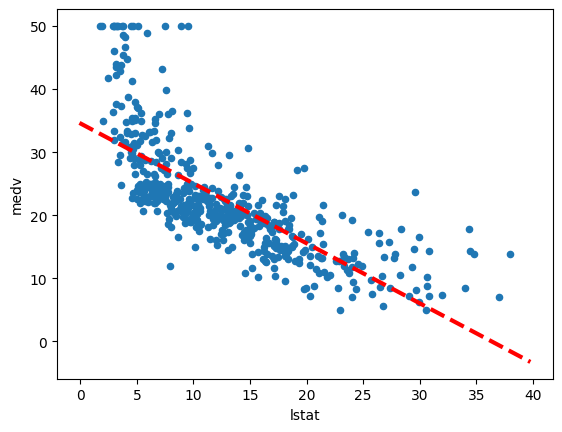

In [11]:
def abline(ax, b, m, *args, **kwargs):
    'Add a line with slope m and intercept b to ax'
    xlim = ax.get_xlim()
    ylim = [m * xlim[0] + b, m * xlim[1] + b]
    ax.plot(xlim, ylim, *args, **kwargs)

ax = Boston.plot.scatter('lstat', 'medv')
abline(ax, 
       results.params[0],
       results.params[1],
       'r--',
       linewidth=3)

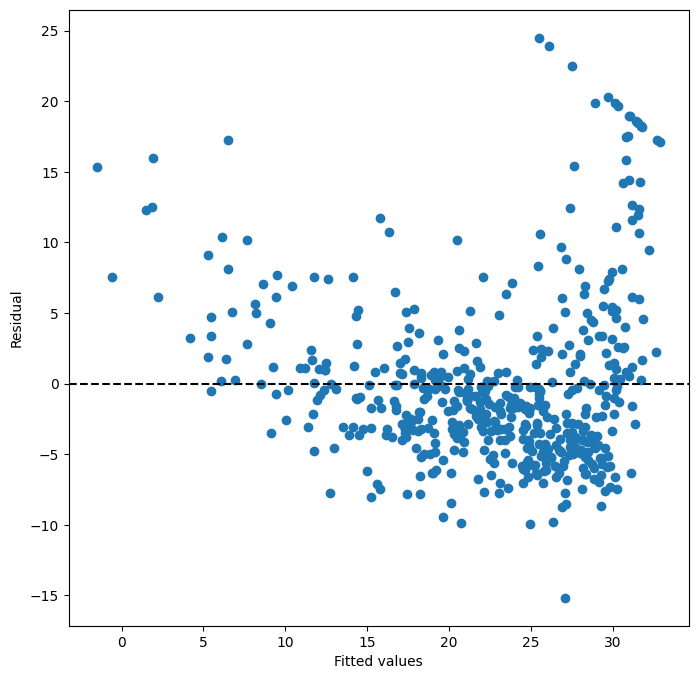

In [12]:
ax = plt.subplots(figsize=(8,8))[1]
ax.scatter(results.fittedvalues, results.resid)
ax.set_xlabel('Fitted values')
ax.set_ylabel('Residual')
ax.axhline(0, c='k', ls='--')

374

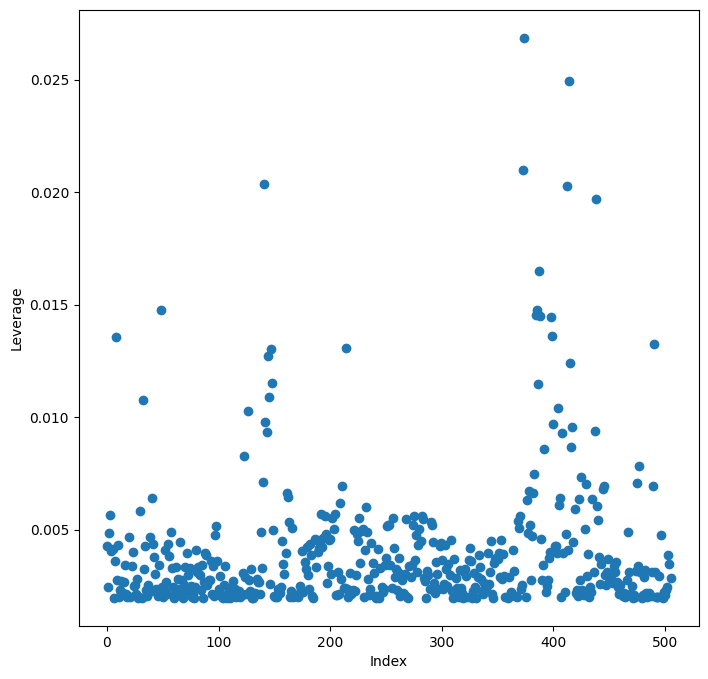

In [13]:
infl = results.get_influence()
ax = plt.subplots(figsize=(8,8))[1]
ax.scatter(np.arange(X.shape[0]), infl.hat_matrix_diag)
ax.set_xlabel('Index')
ax.set_ylabel('Leverage')
np.argmax(infl.hat_matrix_diag)

## 1.2 Multiple Linear Regression

y = $B_0 + B_1 X_1 + B_2 X_2$

In [15]:
X = MS(['lstat', 'age']).fit_transform(Boston)
model1 = sm.OLS(y, X)
results1 = model1.fit()
results1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                   medv   R-squared:                       0.551
Model:                            OLS   Adj. R-squared:                  0.549
Method:                 Least Squares   F-statistic:                     309.0
Date:                Fri, 23 May 2025   Prob (F-statistic):           2.98e-88
Time:                        18:36:09   Log-Likelihood:                -1637.5
No. Observations:                 506   AIC:                             3281.
Df Residuals:                     503   BIC:                             3294.
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
intercept     33.2228      0.731     45.458      0.000      31.787      34.659
lstat         -1.0321      0.048    -21.416      0.000      -1.127      -0.937
age            0.0345      0.012      2.826      0.005       0.011       0.059
==============================================================================
Omnibus:                      124.288   Durbin-Watson:                   0.945
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              244.026
Skew:                           1.362   Prob(JB):                     1.02e-53
Kurtosis:                       5.038   Cond. No.                         201.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

y = $33.2228 -1.0321 X_1 + 0.0345 X_2$

In [16]:
terms = Boston.columns.drop('medv')

X = MS(terms).fit_transform(Boston)
model = sm.OLS(y, X)
results = model.fit()
summarize(results1)

# minus_age = Boston.columns.drop(['medv', 'age'])
# Xma = MS(minus_age).fit_transform(Boston)
# model1 = sm.OLS(y, Xma)
# summarize(model1.fit())

,coef,std err,t,P>|t|
intercept,33.2228,0.731,45.458,0.000
lstat,-1.0321,0.048,-21.416,0.000
age,0.0345,0.012,2.826,0.005


In [17]:
results1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                   medv   R-squared:                       0.551
Model:                            OLS   Adj. R-squared:                  0.549
Method:                 Least Squares   F-statistic:                     309.0
Date:                Fri, 23 May 2025   Prob (F-statistic):           2.98e-88
Time:                        18:36:36   Log-Likelihood:                -1637.5
No. Observations:                 506   AIC:                             3281.
Df Residuals:                     503   BIC:                             3294.
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
intercept     33.2228      0.731     45.458      0.000      31.787      34.659
lstat         -1.0321      0.048    -21.416      0.000      -1.127      -0.937
age            0.0345      0.012      2.826      0.005       0.011       0.059
==============================================================================
Omnibus:                      124.288   Durbin-Watson:                   0.945
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              244.026
Skew:                           1.362   Prob(JB):                     1.02e-53
Kurtosis:                       5.038   Cond. No.                         201.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [18]:
vals = [VIF(X, i) for i in range(1, X.shape[1])]
vif = pd.DataFrame({'vif':vals},
                   index=X.columns[1:])
vif

,vif
crim,1.767486
zn,2.298459
indus,3.987181
chas,1.071168
nox,4.369093
rm,1.912532
age,3.088232
dis,3.954037
rad,7.445301
tax,9.002158


In [19]:
# Interaction terms
X = MS(['lstat',
        'age',
        ('lstat', 'age')]).fit_transform(Boston)
model2 = sm.OLS(y, X)
summarize(model2.fit())

,coef,std err,t,P>|t|
intercept,36.0885,1.470,24.553,0.000
lstat,-1.3921,0.167,-8.313,0.000
age,-0.0007,0.020,-0.036,0.971
lstat:age,0.0042,0.002,2.244,0.025


In [20]:
# Non linear transformations of predictors
X = MS([poly('lstat', degree=2, raw=True), 'age']).fit_transform(Boston)
model3 = sm.OLS(y, X)
results3 = model3.fit()
summarize(results3)

,coef,std err,t,P>|t|
intercept,41.2885,0.873,47.284,0.0
"poly(lstat, degree=2, raw=True)[0]",-2.6883,0.131,-20.502,0.0
"poly(lstat, degree=2, raw=True)[1]",0.0495,0.004,13.315,0.0
age,0.0703,0.011,6.471,0.0


In [21]:
results3.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                   medv   R-squared:                       0.668
Model:                            OLS   Adj. R-squared:                  0.666
Method:                 Least Squares   F-statistic:                     337.3
Date:                Fri, 23 May 2025   Prob (F-statistic):          7.03e-120
Time:                        18:37:17   Log-Likelihood:                -1561.0
No. Observations:                 506   AIC:                             3130.
Df Residuals:                     502   BIC:                             3147.
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
======================================================================================================
                                         coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------------------
intercept                             41.2885      0.873     47.284      0.000      39.573      43.004
poly(lstat, degree=2, raw=True)[0]    -2.6883      0.131    -20.502      0.000      -2.946      -2.431
poly(lstat, degree=2, raw=True)[1]     0.0495      0.004     13.315      0.000       0.042       0.057
age                                    0.0703      0.011      6.471      0.000       0.049       0.092
==============================================================================
Omnibus:                       81.499   Durbin-Watson:                   1.066
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              155.528
Skew:                           0.918   Prob(JB):                     1.69e-34
Kurtosis:                       5.001   Cond. No.                     1.20e+03
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.2e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [22]:
anova_lm(results1, results3)

,df_resid,ssr,df_diff,ss_diff,F,Pr(>F)
0,503.0,19168.128609,0.0,NaN,NaN,NaN
1,502.0,14165.613251,1.0,5002.515357,177.278785,7.468491e-35


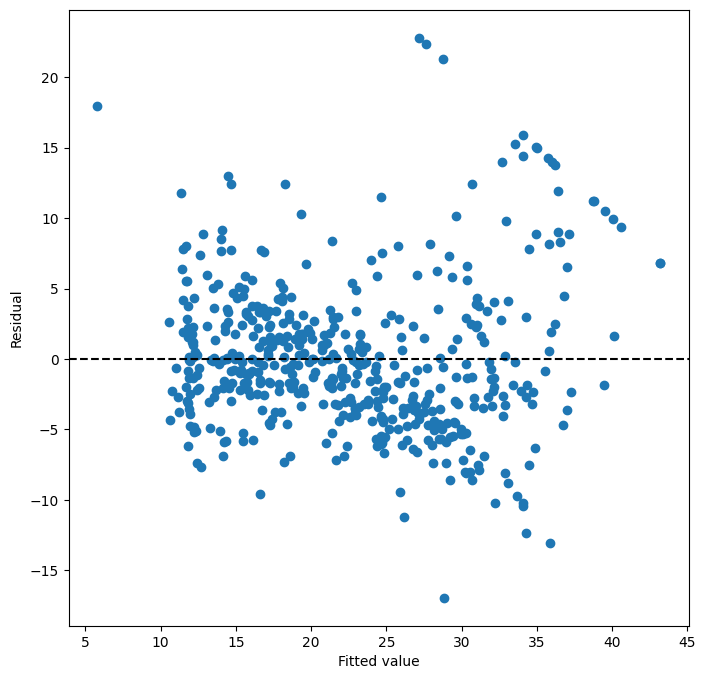

In [18]:
ax = plt.subplots(figsize=(8, 8))[1]
ax.scatter(results3.fittedvalues, results3.resid)
ax.set_xlabel('Fitted value')
ax.set_ylabel('Residual')
ax.axhline(0, c='k', ls='--')

In [19]:
Carseats = load_data('Carseats')
Carseats.columns

Index(['Sales', 'CompPrice', 'Income', 'Advertising', 'Population', 'Price',
       'ShelveLoc', 'Age', 'Education', 'Urban', 'US'],
      dtype='object')

In [20]:
allvars = list(Carseats.columns.drop('Sales'))
y = Carseats['Sales']
final = allvars + [('Income', 'Advertising'),
                   ('Price', 'Age')]
X = MS(final).fit_transform(Carseats)
model = sm.OLS(y, X)
summarize(model.fit())

,coef,std err,t,P>|t|
intercept,6.5756,1.009,6.519,0.000
CompPrice,0.0929,0.004,22.567,0.000
Income,0.0109,0.003,4.183,0.000
Advertising,0.0702,0.023,3.107,0.002
Population,0.0002,0.000,0.433,0.665
Price,-0.1008,0.007,-13.549,0.000
ShelveLoc[Good],4.8487,0.153,31.724,0.000
ShelveLoc[Medium],1.9533,0.126,15.531,0.000
Age,-0.0579,0.016,-3.633,0.000
Education,-0.0209,0.020,-1.063,0.288


In [21]:
X

,intercept,CompPrice,Income,Advertising,Population,Price,ShelveLoc[Good],ShelveLoc[Medium],Age,Education,Urban[Yes],US[Yes],Income:Advertising,Price:Age
0,1.0,138,73,11,276,120,0.0,0.0,42,17,1.0,1.0,803.0,5040.0
1,1.0,111,48,16,260,83,1.0,0.0,65,10,1.0,1.0,768.0,5395.0
2,1.0,113,35,10,269,80,0.0,1.0,59,12,1.0,1.0,350.0,4720.0
3,1.0,117,100,4,466,97,0.0,1.0,55,14,1.0,1.0,400.0,5335.0
4,1.0,141,64,3,340,128,0.0,0.0,38,13,1.0,0.0,192.0,4864.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
395,1.0,138,108,17,203,128,1.0,0.0,33,14,1.0,1.0,1836.0,4224.0
396,1.0,139,23,3,37,120,0.0,1.0,55,11,0.0,1.0,69.0,6600.0
397,1.0,162,26,12,368,159,0.0,1.0,40,18,1.0,1.0,312.0,6360.0
398,1.0,100,79,7,284,95,0.0,0.0,50,12,1.0,1.0,553.0,4750.0


# 2. Exercises

## Conceptual

1. The advertising budgets for TV, Radio and Newspaper can explain the value of sales.
2. Some differences worth noting:
   - the output prediction for the KNN classifier is a discrete/qualitative value (eg. a class), while the output for the KNN regression is continuous/quantitative value;
   - KNN classifier is less intensive computationally than KNN regression;
   - when using KNN classifier, the K value chosen should preferably be an odd number (because if we chose 2 as K there can be situations where the algorithm has to chose between 2 distinct classes), while the K value when we perform a KNN regressor can be any value;
   - KNN classifier uses as evaluation metrics things such as F-scores, while KNN regression uses things such as MSE, RMSE, MAE.
3. y^ = 50 + 20 * GPA + 0.07 * IQ + 35 * Level + 0.01 * (GPA:IQ) + (-10) * (GPA:Level)
   a.
   i.  False
   ii. True?
   iii. True
   iv. False
   b. 137.1
   c. If the coefficient was 0, then this would be true. In order to answer the question statistical tests such as t testing and p-values can be used. False
4.
   a. Even though the true relationship between X and Y is linear, whether the training RSS is lower for the cubic regression depends on how smooth the cubic fit is. We would need to know the coefficients of the cubic regression to answer the question.
   b. Now that we are talking about test RSS, we can easly say that the linear X Y fit would yield a much lower RSS.
   c. Same answer as a.
   d. We cant say because we do not know how far away from linear the fit is. If we plotted the residuals, we could see how far from linear the relationship is and we may be able to make a decision whether we the cubic would have a lower test RSS.
5. I dont know math.

In [22]:
GPA = 0
Level = 1
IQ = 0

print(50 + 20 * GPA + 0.07 * IQ + 35 * Level + 0.01 * (GPA*IQ) + (-10) * (GPA*Level))

85.0


## Applied

In [23]:
Auto = load_data('Auto')

In [24]:
Auto

,mpg,cylinders,displacement,horsepower,weight,acceleration,year,origin,name
0,18.0,8,307.0,130,3504,12.0,70,1,chevrolet chevelle malibu
1,15.0,8,350.0,165,3693,11.5,70,1,buick skylark 320
2,18.0,8,318.0,150,3436,11.0,70,1,plymouth satellite
3,16.0,8,304.0,150,3433,12.0,70,1,amc rebel sst
4,17.0,8,302.0,140,3449,10.5,70,1,ford torino
...,...,...,...,...,...,...,...,...,...
387,27.0,4,140.0,86,2790,15.6,82,1,ford mustang gl
388,44.0,4,97.0,52,2130,24.6,82,2,vw pickup
389,32.0,4,135.0,84,2295,11.6,82,1,dodge rampage
390,28.0,4,120.0,79,2625,18.6,82,1,ford ranger


In [25]:
X = pd.DataFrame({'intercept': np.ones(Auto.shape[0]),
                  'horsepower': Auto['horsepower']})
y = Auto['mpg']
model = sm.OLS(y,X)
results = model.fit()
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    mpg   R-squared:                       0.606
Model:                            OLS   Adj. R-squared:                  0.605
Method:                 Least Squares   F-statistic:                     599.7
Date:                Sat, 07 Oct 2023   Prob (F-statistic):           7.03e-81
Time:                        21:35:16   Log-Likelihood:                -1178.7
No. Observations:                 392   AIC:                             2361.
Df Residuals:                     390   BIC:                             2369.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
intercept     39.9359      0.717     55.660      0.000      38.525      41.347
horsepower    -0.1578      0.006    -24.489      0.000      -0.171      -0.145
==============================================================================
Omnibus:                       16.432   Durbin-Watson:                   0.920
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               17.305
Skew:                           0.492   Prob(JB):                     0.000175
Kurtosis:                       3.299   Cond. No.                         322.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [26]:
iv = results.get_prediction([1, 98])
prediction = iv.summary_frame().iloc[0,0]
conf_int = iv.conf_int(alpha=0.05)[0]
pred_int = iv.conf_int(obs=True, alpha=0.05)[0]
print('For a value of 98 horsepower the model predicts', prediction, 'of mpg with a confidence interval of', conf_int, 'and a prediction interval of', pred_int)

For a value of 98 horsepower the model predicts 24.46707715251243 of mpg with a confidence interval of [23.97307896 24.96107534] and a prediction interval of [14.80939607 34.12475823]


# Ex. 8

(a)

i. A high (inverse) t value and a very low p value indicate a relationship between the predictor (horsepower) and the response (mpg);

ii. The strength can be measured with the correlation coefficient (Rsq) which has a value of 0.61 (strong relationship);

iii. The relationship is negative because the coefficient is negative;

iv. For a value of 98 horsepower the model predicts 24.46707715251243 of mpg with a confidence interval of [23.97307896 24.96107534] and a prediction interval of [14.80939607 34.12475823]

In [27]:
results.params

intercept     39.935861
horsepower    -0.157845
dtype: float64

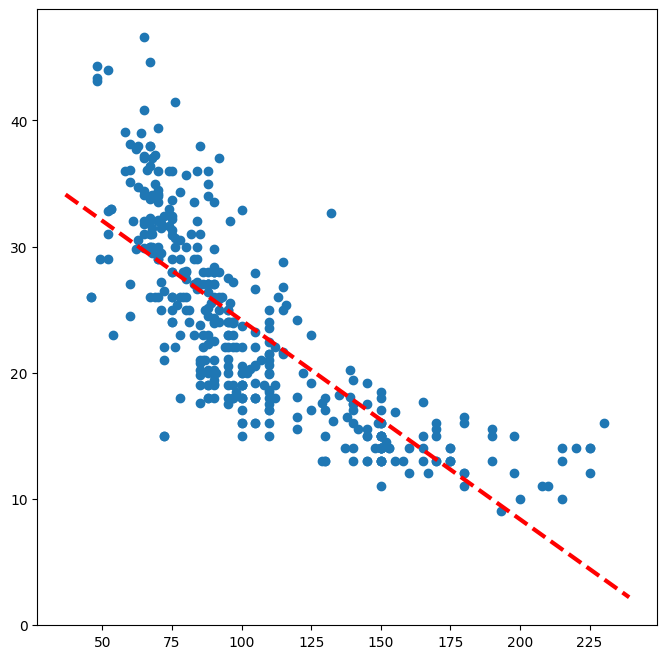

In [28]:
def abline(ax, b, m, *args, **kwargs):
    'Add a line with slope m and intercept b to ax'
    xlim = ax.get_xlim()
    ylim = [m * xlim[0] + b, m * xlim[1] + b]
    ax.plot(xlim, ylim, *args, **kwargs)

b, m = tuple(results.params)

fig = plt.figure(figsize=(8, 8))
ax = fig.add_subplot()
ax.scatter(X['horsepower'],
           y)
abline(ax, b, m, 'r--', linewidth=3)

The residuals exhibit a quadratic shape which may indicate that the linear regression may not be well suited for this analysis.

115

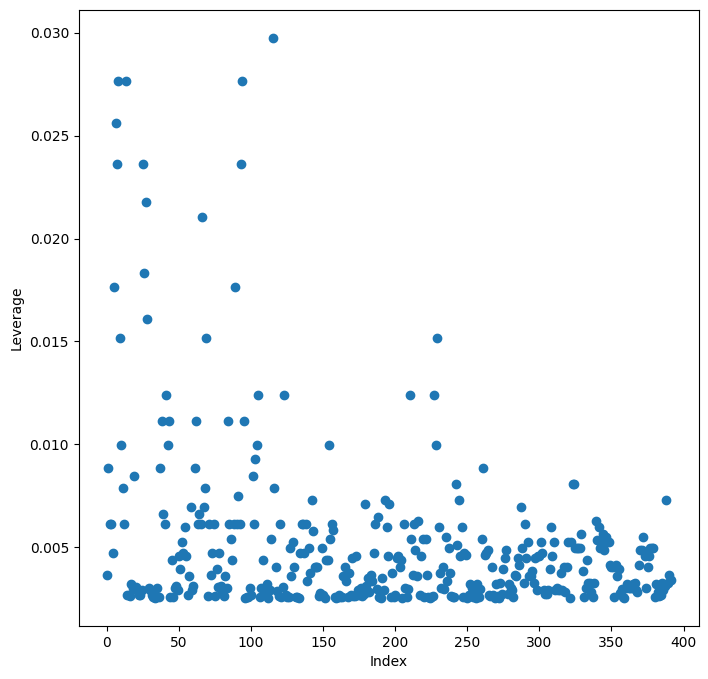

In [29]:
infl = results.get_influence()
ax = plt.subplots(figsize=(8,8))[1]
ax.scatter(np.arange(X.shape[0]), infl.hat_matrix_diag)
ax.set_xlabel('Index')
ax.set_ylabel('Leverage')
np.argmax(infl.hat_matrix_diag)

In [30]:
# source = https://www.statsmodels.org/dev/examples/notebooks/generated/regression_diagnostics.html

# base code
import numpy as np
import seaborn as sns
from statsmodels.tools.tools import maybe_unwrap_results
from statsmodels.graphics.gofplots import ProbPlot
from statsmodels.stats.outliers_influence import variance_inflation_factor
import matplotlib.pyplot as plt
from typing import Type

style_talk = 'seaborn-talk'    #refer to plt.style.available

class LinearRegDiagnostic():
    """
    Diagnostic plots to identify potential problems in a linear regression fit.
    Mainly,
        a. non-linearity of data
        b. Correlation of error terms
        c. non-constant variance
        d. outliers
        e. high-leverage points
        f. collinearity

    Authors:
        Prajwal Kafle (p33ajkafle@gmail.com, where 3 = r)
        Does not come with any sort of warranty.
        Please test the code one your end before using.

        Matt Spinelli (m3spinelli@gmail.com, where 3 = r)
        (1) Fixed incorrect annotation of the top most extreme residuals in
            the Residuals vs Fitted and, especially, the Normal Q-Q plots.
        (2) Changed Residuals vs Leverage plot to match closer the y-axis
            range shown in the equivalent plot in the R package ggfortify.
        (3) Added horizontal line at y=0 in Residuals vs Leverage plot to
            match the plots in R package ggfortify and base R.
        (4) Added option for placing a vertical guideline on the Residuals
            vs Leverage plot using the rule of thumb of h = 2p/n to denote
            high leverage (high_leverage_threshold=True).
        (5) Added two more ways to compute the Cook's Distance (D) threshold:
            * 'baseR': D > 1 and D > 0.5 (default)
            * 'convention': D > 4/n
            * 'dof': D > 4 / (n - k - 1)
        (6) Fixed class name to conform to Pascal casing convention
        (7) Fixed Residuals vs Leverage legend to work with loc='best'
    """

    def __init__(self,
                 results: Type[statsmodels.regression.linear_model.RegressionResultsWrapper]) -> None:
        """
        For a linear regression model, generates following diagnostic plots:

        a. residual
        b. qq
        c. scale location and
        d. leverage

        and a table

        e. vif

        Args:
            results (Type[statsmodels.regression.linear_model.RegressionResultsWrapper]):
                must be instance of statsmodels.regression.linear_model object

        Raises:
            TypeError: if instance does not belong to above object

        Example:
        >>> import numpy as np
        >>> import pandas as pd
        >>> import statsmodels.formula.api as smf
        >>> x = np.linspace(-np.pi, np.pi, 100)
        >>> y = 3*x + 8 + np.random.normal(0,1, 100)
        >>> df = pd.DataFrame({'x':x, 'y':y})
        >>> res = smf.ols(formula= "y ~ x", data=df).fit()
        >>> cls = Linear_Reg_Diagnostic(res)
        >>> cls(plot_context="seaborn-paper")

        In case you do not need all plots you can also independently make an individual plot/table
        in following ways

        >>> cls = Linear_Reg_Diagnostic(res)
        >>> cls.residual_plot()
        >>> cls.qq_plot()
        >>> cls.scale_location_plot()
        >>> cls.leverage_plot()
        >>> cls.vif_table()
        """

        if isinstance(results, statsmodels.regression.linear_model.RegressionResultsWrapper) is False:
            raise TypeError("result must be instance of statsmodels.regression.linear_model.RegressionResultsWrapper object")

        self.results = maybe_unwrap_results(results)

        self.y_true = self.results.model.endog
        self.y_predict = self.results.fittedvalues
        self.xvar = self.results.model.exog
        self.xvar_names = self.results.model.exog_names

        self.residual = np.array(self.results.resid)
        influence = self.results.get_influence()
        self.residual_norm = influence.resid_studentized_internal
        self.leverage = influence.hat_matrix_diag
        self.cooks_distance = influence.cooks_distance[0]
        self.nparams = len(self.results.params)
        self.nresids = len(self.residual_norm)

    def __call__(self, plot_context='seaborn-paper', **kwargs):
        # print(plt.style.available)
        with plt.style.context(plot_context):
            fig, ax = plt.subplots(nrows=2, ncols=2, figsize=(10,10))
            self.residual_plot(ax=ax[0,0])
            self.qq_plot(ax=ax[0,1])
            self.scale_location_plot(ax=ax[1,0])
            self.leverage_plot(
                ax=ax[1,1],
                high_leverage_threshold = kwargs.get('high_leverage_threshold'),
                cooks_threshold = kwargs.get('cooks_threshold'))
            plt.show()

        return self.vif_table(), fig, ax,

    def residual_plot(self, ax=None):
        """
        Residual vs Fitted Plot

        Graphical tool to identify non-linearity.
        (Roughly) Horizontal red line is an indicator that the residual has a linear pattern
        """
        if ax is None:
            fig, ax = plt.subplots()

        sns.residplot(
            x=self.y_predict,
            y=self.residual,
            lowess=True,
            scatter_kws={'alpha': 0.5},
            line_kws={'color': 'red', 'lw': 1, 'alpha': 0.8},
            ax=ax)

        # annotations
        residual_abs = np.abs(self.residual)
        abs_resid = np.flip(np.argsort(residual_abs), 0)
        abs_resid_top_3 = abs_resid[:3]
        for i in abs_resid_top_3:
            ax.annotate(
                i,
                xy=(self.y_predict[i], self.residual[i]),
                color='C3')

        ax.set_title('Residuals vs Fitted', fontweight="bold")
        ax.set_xlabel('Fitted values')
        ax.set_ylabel('Residuals')
        return ax

    def qq_plot(self, ax=None):
        """
        Standarized Residual vs Theoretical Quantile plot

        Used to visually check if residuals are normally distributed.
        Points spread along the diagonal line will suggest so.
        """
        if ax is None:
            fig, ax = plt.subplots()

        QQ = ProbPlot(self.residual_norm)
        fig = QQ.qqplot(line='45', alpha=0.5, lw=1, ax=ax)

        # annotations
        abs_norm_resid = np.flip(np.argsort(np.abs(self.residual_norm)), 0)
        abs_norm_resid_top_3 = abs_norm_resid[:3]
        for i, x, y in self.__qq_top_resid(QQ.theoretical_quantiles, abs_norm_resid_top_3):
            ax.annotate(
                i,
                xy=(x, y),
                ha='right',
                color='C3')

        ax.set_title('Normal Q-Q', fontweight="bold")
        ax.set_xlabel('Theoretical Quantiles')
        ax.set_ylabel('Standardized Residuals')
        return ax

    def scale_location_plot(self, ax=None):
        """
        Sqrt(Standarized Residual) vs Fitted values plot

        Used to check homoscedasticity of the residuals.
        Horizontal line will suggest so.
        """
        if ax is None:
            fig, ax = plt.subplots()

        residual_norm_abs_sqrt = np.sqrt(np.abs(self.residual_norm))

        ax.scatter(self.y_predict, residual_norm_abs_sqrt, alpha=0.5);
        sns.regplot(
            x=self.y_predict,
            y=residual_norm_abs_sqrt,
            scatter=False, ci=False,
            lowess=True,
            line_kws={'color': 'red', 'lw': 1, 'alpha': 0.8},
            ax=ax)

        # annotations
        abs_sq_norm_resid = np.flip(np.argsort(residual_norm_abs_sqrt), 0)
        abs_sq_norm_resid_top_3 = abs_sq_norm_resid[:3]
        for i in abs_sq_norm_resid_top_3:
            ax.annotate(
                i,
                xy=(self.y_predict[i], residual_norm_abs_sqrt[i]),
                color='C3')

        ax.set_title('Scale-Location', fontweight="bold")
        ax.set_xlabel('Fitted values')
        ax.set_ylabel(r'$\sqrt{|\mathrm{Standardized\ Residuals}|}$');
        return ax

    def leverage_plot(self, ax=None, high_leverage_threshold=False, cooks_threshold='baseR'):
        """
        Residual vs Leverage plot

        Points falling outside Cook's distance curves are considered observation that can sway the fit
        aka are influential.
        Good to have none outside the curves.
        """
        if ax is None:
            fig, ax = plt.subplots()

        ax.scatter(
            self.leverage,
            self.residual_norm,
            alpha=0.5);

        sns.regplot(
            x=self.leverage,
            y=self.residual_norm,
            scatter=False,
            ci=False,
            lowess=True,
            line_kws={'color': 'red', 'lw': 1, 'alpha': 0.8},
            ax=ax)

        # annotations
        leverage_top_3 = np.flip(np.argsort(self.cooks_distance), 0)[:3]
        for i in leverage_top_3:
            ax.annotate(
                i,
                xy=(self.leverage[i], self.residual_norm[i]),
                color = 'C3')

        factors = []
        if cooks_threshold == 'baseR' or cooks_threshold is None:
            factors = [1, 0.5]
        elif cooks_threshold == 'convention':
            factors = [4/self.nresids]
        elif cooks_threshold == 'dof':
            factors = [4/ (self.nresids - self.nparams)]
        else:
            raise ValueError("threshold_method must be one of the following: 'convention', 'dof', or 'baseR' (default)")
        for i, factor in enumerate(factors):
            label = "Cook's distance" if i == 0 else None
            xtemp, ytemp = self.__cooks_dist_line(factor)
            ax.plot(xtemp, ytemp, label=label, lw=1.25, ls='--', color='red')
            ax.plot(xtemp, np.negative(ytemp), lw=1.25, ls='--', color='red')

        if high_leverage_threshold:
            high_leverage = 2 * self.nparams / self.nresids
            if max(self.leverage) > high_leverage:
                ax.axvline(high_leverage, label='High leverage', ls='-.', color='purple', lw=1)

        ax.axhline(0, ls='dotted', color='black', lw=1.25)
        ax.set_xlim(0, max(self.leverage)+0.01)
        ax.set_ylim(min(self.residual_norm)-0.1, max(self.residual_norm)+0.1)
        ax.set_title('Residuals vs Leverage', fontweight="bold")
        ax.set_xlabel('Leverage')
        ax.set_ylabel('Standardized Residuals')
        plt.legend(loc='best')
        return ax

    def vif_table(self):
        """
        VIF table

        VIF, the variance inflation factor, is a measure of multicollinearity.
        VIF > 5 for a variable indicates that it is highly collinear with the
        other input variables.
        """
        vif_df = pd.DataFrame()
        vif_df["Features"] = self.xvar_names
        vif_df["VIF Factor"] = [variance_inflation_factor(self.xvar, i) for i in range(self.xvar.shape[1])]

        return (vif_df
                .sort_values("VIF Factor")
                .round(2))


    def __cooks_dist_line(self, factor):
        """
        Helper function for plotting Cook's distance curves
        """
        p = self.nparams
        formula = lambda x: np.sqrt((factor * p * (1 - x)) / x)
        x = np.linspace(0.001, max(self.leverage), 50)
        y = formula(x)
        return x, y


    def __qq_top_resid(self, quantiles, top_residual_indices):
        """
        Helper generator function yielding the index and coordinates
        """
        offset = 0
        quant_index = 0
        previous_is_negative = None
        for resid_index in top_residual_indices:
            y = self.residual_norm[resid_index]
            is_negative = y < 0
            if previous_is_negative == None or previous_is_negative == is_negative:
                offset += 1
            else:
                quant_index -= offset
            x = quantiles[quant_index] if is_negative else np.flip(quantiles, 0)[quant_index]
            quant_index += 1
            previous_is_negative = is_negative
            yield resid_index, x, y



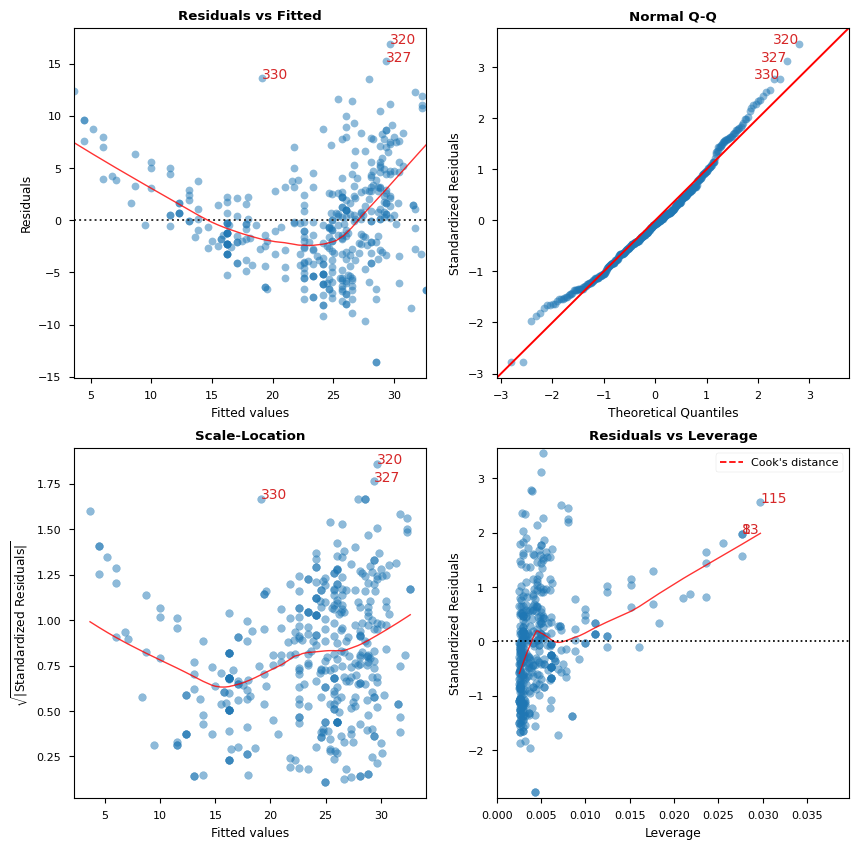

     Features  VIF Factor
1  horsepower        1.00
0   intercept        8.39


In [31]:
cls = LinearRegDiagnostic(results)
vif, fig, ax = cls()
print(vif)

The residuals vs fitted values shows a clear non-linearity in the data. 

# Ex. 9

(a) Produce a scatterplot matrix which includes all of the variables in the data set.

/tmp/ipykernel_24055/1723000394.py:16: UserWarning: To output multiple subplots, the figure containing the passed axes is being cleared.
  ax = pd.plotting.scatter_matrix(Auto[quantitative], ax=ax)


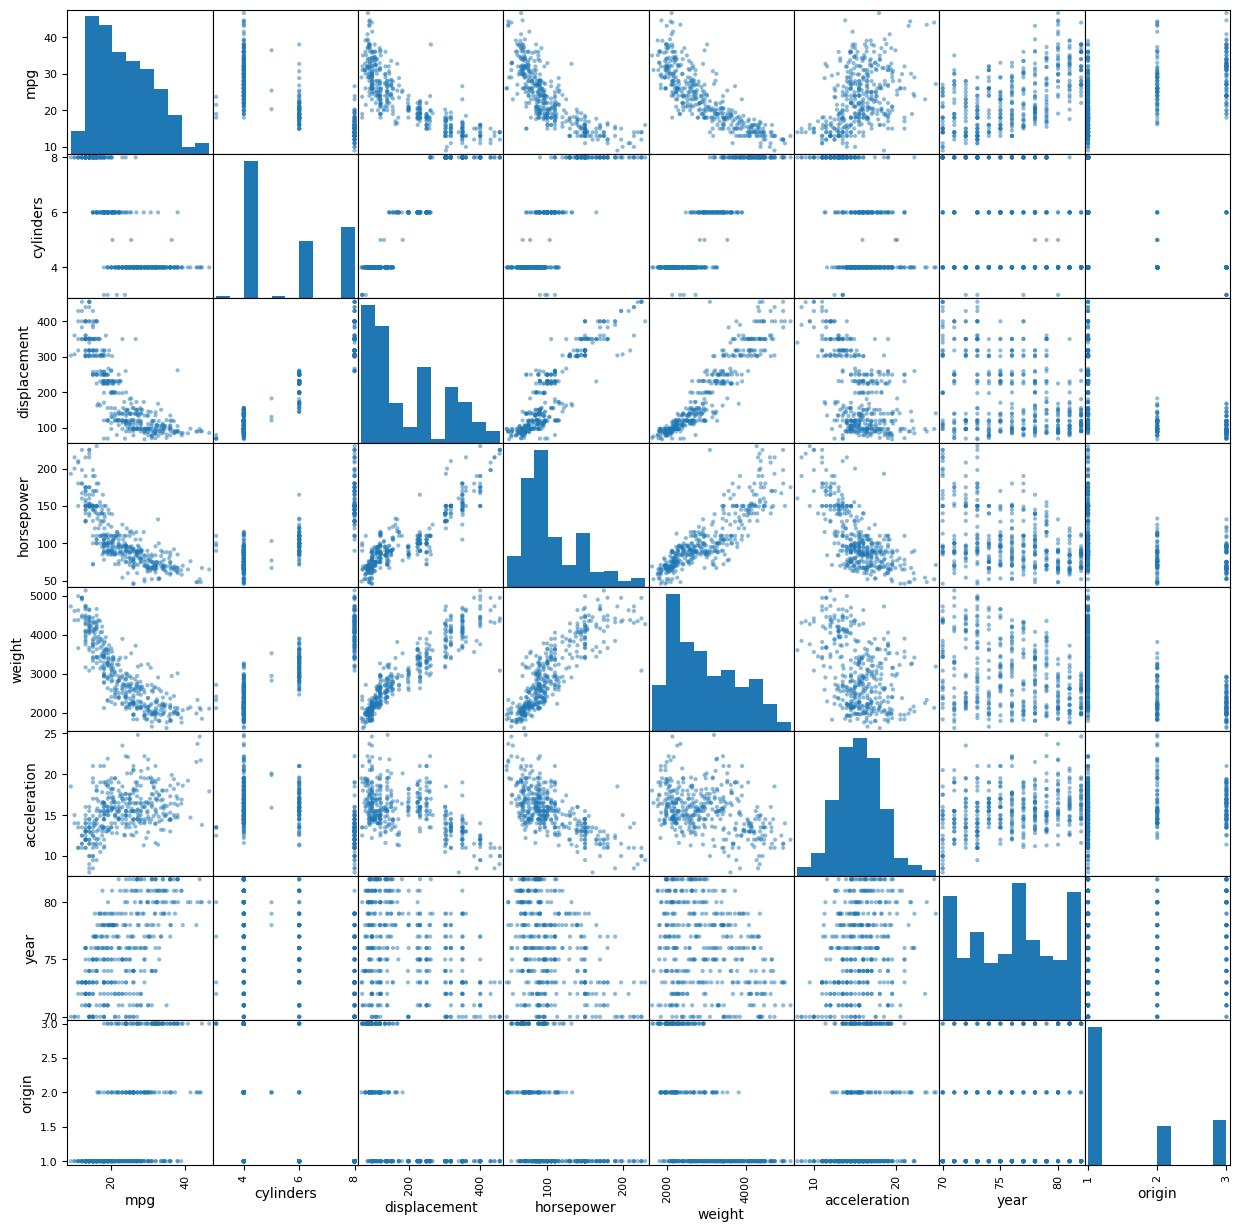

In [32]:
# Auto = '../datasets/Auto.csv'
# Auto = pd.read_csv(Auto)

# # Convert columns that contain numbers from "object" to "float"
# conv_cols = Auto.apply(pd.to_numeric, errors='coerce')
# conv_cols = conv_cols[Auto.columns[~conv_cols.isnull().all()]]
# common_columns = conv_cols.columns
# additional_columns = [col for col in Auto.columns if col not in common_columns]
# Auto = conv_cols.merge(Auto[additional_columns], left_index=True, right_index=True)

# Auto.dropna(axis=0, how='any', inplace=True)

quantitative = Auto.iloc[:, :8].columns
qualitative = Auto.iloc[:, 8:].columns
fig, ax = plt.subplots(figsize=(15,15))
ax = pd.plotting.scatter_matrix(Auto[quantitative], ax=ax)

(b) Compute the matrix of correlations between the variables using the DataFrame.corr() method.

In [33]:
corr_matrix = Auto[quantitative].corr()
corr_matrix

,mpg,cylinders,displacement,horsepower,weight,acceleration,year,origin
mpg,1.000000,-0.777618,-0.805127,-0.778427,-0.832244,0.423329,0.580541,0.565209
cylinders,-0.777618,1.000000,0.950823,0.842983,0.897527,-0.504683,-0.345647,-0.568932
displacement,-0.805127,0.950823,1.000000,0.897257,0.932994,-0.543800,-0.369855,-0.614535
horsepower,-0.778427,0.842983,0.897257,1.000000,0.864538,-0.689196,-0.416361,-0.455171
weight,-0.832244,0.897527,0.932994,0.864538,1.000000,-0.416839,-0.309120,-0.585005
acceleration,0.423329,-0.504683,-0.543800,-0.689196,-0.416839,1.000000,0.290316,0.212746
year,0.580541,-0.345647,-0.369855,-0.416361,-0.309120,0.290316,1.000000,0.181528
origin,0.565209,-0.568932,-0.614535,-0.455171,-0.585005,0.212746,0.181528,1.000000


(c) Use the sm.OLS() function to perform a multiple linear regression with mpg as the response and all other variables except name as the predictors. Use the summarize() function to print the  results. Comment on the output

In [34]:
lr1 = smf.ols(formula='mpg ~ 1', data=Auto)
lr1 = lr1.fit()

In [35]:
y = Auto['mpg'].reset_index(drop=True)
X = list(Auto.iloc[:, 1:8].columns)
X = ' + '.join(X)
model = smf.ols(formula=f'mpg ~ {X}', data=Auto) # apparently anova_lm doesnt work with the MS function, gotta use the api instead!
# X = MS(X).fit_transform(Auto).reset_index(drop=True)
results = model.fit()
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    mpg   R-squared:                       0.821
Model:                            OLS   Adj. R-squared:                  0.818
Method:                 Least Squares   F-statistic:                     252.4
Date:                Sat, 07 Oct 2023   Prob (F-statistic):          2.04e-139
Time:                        21:35:50   Log-Likelihood:                -1023.5
No. Observations:                 392   AIC:                             2063.
Df Residuals:                     384   BIC:                             2095.
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
================================================================================
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
Intercept      -17.2184      4.644     -3.707      0.000     -26.350      -8.087
cylinders       -0.4934      0.323     -1.526      0.128      -1.129       0.142
displacement     0.0199      0.008      2.647      0.008       0.005       0.035
horsepower      -0.0170      0.014     -1.230      0.220      -0.044       0.010
weight          -0.0065      0.001     -9.929      0.000      -0.008      -0.005
acceleration     0.0806      0.099      0.815      0.415      -0.114       0.275
year             0.7508      0.051     14.729      0.000       0.651       0.851
origin           1.4261      0.278      5.127      0.000       0.879       1.973
==============================================================================
Omnibus:                       31.906   Durbin-Watson:                   1.309
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               53.100
Skew:                           0.529   Prob(JB):                     2.95e-12
Kurtosis:                       4.460   Cond. No.                     8.59e+04
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 8.59e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

i. Is there a relationship between the predictors and the response? Use the anova_lm() function from statsmodels to answer this question.

In [36]:
anova_lm(lr1, results).round(3)

,df_resid,ssr,df_diff,ss_diff,F,Pr(>F)
0,391.0,23818.993,0.0,NaN,NaN,NaN
1,384.0,4252.213,7.0,19566.781,252.428,0.0


There is a relationship between the predictors and the response since the F statistic is high and the p-value associated is really low.

ii. Which predictors appear to have a statistically significant relationship to the response?

The t statistics and the p-values in the summary output suggest that all the predictors beside cylinders, horsepower and acceleration have a significant relationship to the response.

iii. What does the coefficient for the year variable suggest?

It suggests that for every one year, the mpg grows by 0.7508.

(d) Produce some of diagnostic plots of the linear regression fit as described in the lab.

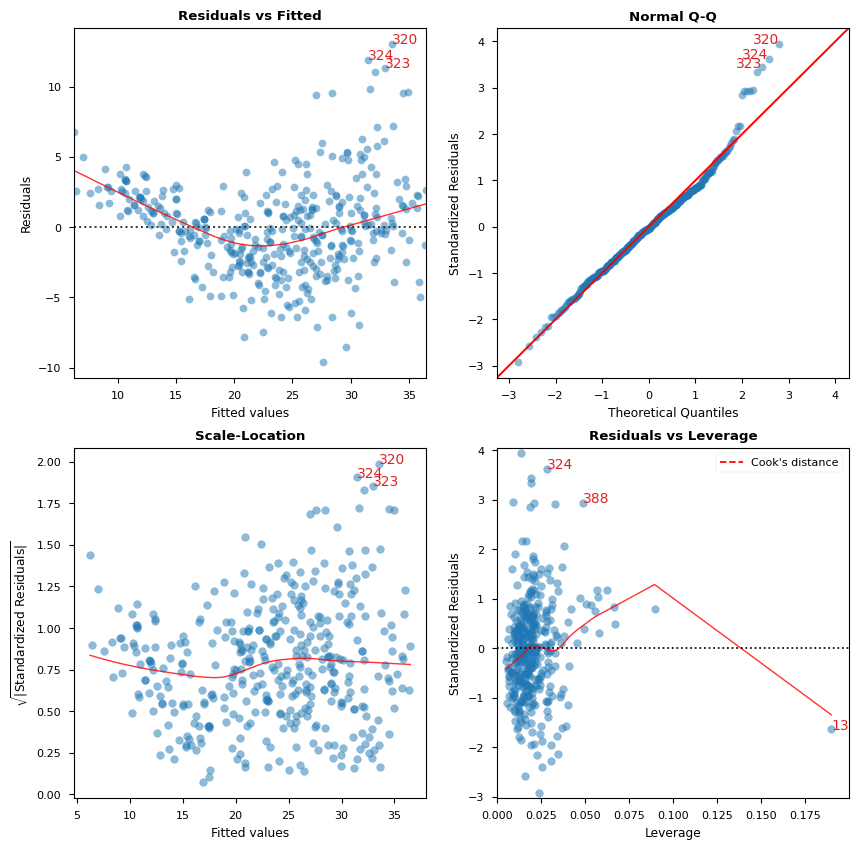

       Features  VIF Factor
6          year        1.24
7        origin        1.77
5  acceleration        2.63
3    horsepower        9.94
1     cylinders       10.74
4        weight       10.83
2  displacement       21.84
0     Intercept      763.56


In [37]:
cls = LinearRegDiagnostic(results)
vif, fig, ax = cls()
print(vif)

The residualds vs leverage plot suggests the presence of some outliers and some high leverage points. Lets analyze further.

In [38]:
cooksD = statsmodels.stats.outliers_influence.OLSInfluence(results).cooks_distance[0]
cooksD_mean = cooksD.mean()
outliers = cooksD[cooksD > 3 * cooksD_mean]
outliers

8      0.011511
13     0.077801
43     0.021276
53     0.010095
70     0.015242
107    0.013669
110    0.026352
115    0.010477
152    0.013900
153    0.020427
164    0.018632
208    0.009615
241    0.012459
242    0.027797
268    0.013575
273    0.011482
275    0.012231
307    0.010496
320    0.027064
322    0.010112
323    0.029605
324    0.048772
325    0.019274
327    0.022966
330    0.012899
331    0.020624
340    0.009076
361    0.009314
381    0.036773
383    0.010167
388    0.055824
dtype: float64

Above we have selected the points that fall outside the cooks distance (computed as 3 times the mean cooks distance). As we can see, there are a lot of points that should be removed in the regression. Lets see how much removing these points would improve the model.

In [39]:
Auto_removed = Auto[~Auto.index.isin(outliers.index.values)]
y = Auto_removed['mpg'].reset_index(drop=True)
X = list(Auto_removed.iloc[:, 1:8].columns)
X = ' + '.join(X)
model = smf.ols(formula=f'mpg ~ {X}', data=Auto_removed) # apparently anova_lm doesnt work with the MS function, gotta use the api instead!
# X = MS(X).fit_transform(Auto).reset_index(drop=True)
results = model.fit()
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    mpg   R-squared:                       0.883
Model:                            OLS   Adj. R-squared:                  0.880
Method:                 Least Squares   F-statistic:                     379.5
Date:                Sat, 07 Oct 2023   Prob (F-statistic):          4.95e-160
Time:                        21:36:11   Log-Likelihood:                -839.56
No. Observations:                 361   AIC:                             1695.
Df Residuals:                     353   BIC:                             1726.
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
================================================================================
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
Intercept       -8.7486      3.678     -2.379      0.018     -15.982      -1.515
cylinders       -0.6658      0.259     -2.575      0.010      -1.174      -0.157
displacement     0.0120      0.006      1.888      0.060      -0.001       0.024
horsepower      -0.0191      0.012     -1.650      0.100      -0.042       0.004
weight          -0.0054      0.001     -9.290      0.000      -0.007      -0.004
acceleration    -0.1502      0.083     -1.806      0.072      -0.314       0.013
year             0.6791      0.040     16.948      0.000       0.600       0.758
origin           1.3894      0.217      6.389      0.000       0.962       1.817
==============================================================================
Omnibus:                        2.268   Durbin-Watson:                   1.368
Prob(Omnibus):                  0.322   Jarque-Bera (JB):                2.297
Skew:                           0.155   Prob(JB):                        0.317
Kurtosis:                       2.763   Cond. No.                     8.72e+04
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 8.72e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

If we loot at the R squared statistic it turns out that removing the points outside the cooks distance threshold of 3x the mean cooks distance improved the model.

(e) Fit some models with interactions as described in the lab. Do any interactions appear to be statistically significant?

In [40]:
y = Auto['mpg'].reset_index(drop=True)
X = list(Auto.iloc[:, 1:8].columns)
X_simple = ' + '.join(X)
X_interactions = []
for i, p in enumerate(X):
    x_copy = X[:]
    x_copy.pop(i)
    for k in x_copy:
        X_interactions.append([p, k])
for i, interaction in enumerate(X_interactions):
    X_interactions[i] = f'{interaction[0]} * {interaction[1]}'
X_interactions = ' + '.join(X_interactions)
model = smf.ols(formula=f'mpg ~ {X_simple} + {X_interactions}', data=Auto) # apparently anova_lm doesnt work with the MS function, gotta use the api instead!
# X = MS(X).fit_transform(Auto).reset_index(drop=True)
results = model.fit()
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    mpg   R-squared:                       0.889
Model:                            OLS   Adj. R-squared:                  0.881
Method:                 Least Squares   F-statistic:                     104.2
Date:                Sat, 07 Oct 2023   Prob (F-statistic):          4.01e-155
Time:                        21:36:15   Log-Likelihood:                -929.72
No. Observations:                 392   AIC:                             1917.
Df Residuals:                     363   BIC:                             2033.
Df Model:                          28                                         
Covariance Type:            nonrobust                                         
=============================================================================================
                                coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------------
Intercept                    35.4789     53.136      0.668      0.505     -69.014     139.972
cylinders                     6.9886      8.248      0.847      0.397      -9.231      23.208
displacement                 -0.4785      0.189     -2.527      0.012      -0.851      -0.106
horsepower                    0.5034      0.347      1.451      0.148      -0.179       1.186
weight                        0.0041      0.018      0.235      0.814      -0.030       0.039
acceleration                 -5.8592      2.174     -2.696      0.007     -10.134      -1.585
year                          0.6974      0.610      1.144      0.253      -0.501       1.896
origin                      -20.8956      7.097     -2.944      0.003     -34.852      -6.939
cylinders:displacement       -0.0034      0.006     -0.524      0.601      -0.016       0.009
cylinders:horsepower          0.0116      0.024      0.480      0.632      -0.036       0.059
cylinders:weight              0.0004      0.001      0.399      0.690      -0.001       0.002
cylinders:acceleration        0.2779      0.166      1.670      0.096      -0.049       0.605
cylinders:year               -0.1741      0.097     -1.793      0.074      -0.365       0.017
cylinders:origin              0.4022      0.493      0.816      0.415      -0.567       1.371
displacement:horsepower   -8.491e-05      0.000     -0.294      0.769      -0.001       0.000
displacement:weight        2.472e-05   1.47e-05      1.682      0.093   -4.18e-06    5.36e-05
displacement:acceleration    -0.0035      0.003     -1.041      0.299      -0.010       0.003
displacement:year             0.0059      0.002      2.482      0.014       0.001       0.011
displacement:origin           0.0240      0.019      1.232      0.219      -0.014       0.062
horsepower:weight         -1.968e-05   2.92e-05     -0.673      0.501   -7.72e-05    3.78e-05
horsepower:acceleration      -0.0072      0.004     -1.939      0.053      -0.015       0.000
horsepower:year              -0.0058      0.004     -1.482      0.139      -0.014       0.002
horsepower:origin             0.0022      0.029      0.076      0.939      -0.055       0.060
weight:acceleration           0.0002      0.000      1.025      0.306      -0.000       0.001
weight:year                  -0.0002      0.000     -1.056      0.292      -0.001       0.000
weight:origin                -0.0006      0.002     -0.364      0.716      -0.004       0.003
acceleration:year             0.0556      0.026      2.174      0.030       0.005       0.106
acceleration:origin           0.4583      0.157      2.926      0.004       0.150       0.766
year:origin                   0.1393      0.074      1.882      0.061      -0.006       0.285
===========================================================================

In [41]:
anova_lm(lr1, results).round(3)

,df_resid,ssr,df_diff,ss_diff,F,Pr(>F)
0,391.0,23818.993,0.0,NaN,NaN,NaN
1,363.0,2635.573,28.0,21183.421,104.2,0.0


We have fit a model with every possible permutation. The summary table suggests that some interactions may be relevant. Also, the R squared of this multiple linear regression model has increasead a lot, even more than just removing the outliers. Some interactions that may be notable are displacement:year, acceleration:origin, acceleration:year etc.

(f) Try a few different transformations of the variables, such as log(X), √X and X squared.

Let's try every single transformation for every single variable...

In [42]:
transformations = ['np.square(weight)', 'np.sqrt(horsepower)', 'np.log(displacement)']

y = Auto['mpg'].reset_index(drop=True)
X = list(Auto.iloc[:, 1:8].columns)

X_simple = ' + '.join(X)
X_transformed = ' + '.join(transformations)

model = smf.ols(formula=f'mpg ~ {X_simple} + {X_transformed}', data=Auto) # apparently anova_lm doesnt work with the MS function, gotta use the api instead!
# X = MS(X).fit_transform(Auto).reset_index(drop=True)
results = model.fit()
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    mpg   R-squared:                       0.865
Model:                            OLS   Adj. R-squared:                  0.862
Method:                 Least Squares   F-statistic:                     244.9
Date:                Sat, 07 Oct 2023   Prob (F-statistic):          4.24e-159
Time:                        21:36:18   Log-Likelihood:                -968.20
No. Observations:                 392   AIC:                             1958.
Df Residuals:                     381   BIC:                             2002.
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
========================================================================================
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
Intercept               37.5339     10.256      3.660      0.000      17.368      57.700
cylinders                0.0184      0.291      0.063      0.950      -0.554       0.591
displacement             0.0081      0.014      0.579      0.563      -0.019       0.036
horsepower               0.2519      0.062      4.038      0.000       0.129       0.374
weight                  -0.0111      0.003     -4.056      0.000      -0.016      -0.006
acceleration            -0.1982      0.100     -1.972      0.049      -0.396      -0.001
year                     0.7719      0.045     17.115      0.000       0.683       0.861
origin                   0.6489      0.268      2.425      0.016       0.123       1.175
np.square(weight)     1.089e-06   3.68e-07      2.958      0.003    3.65e-07    1.81e-06
np.sqrt(horsepower)     -6.5710      1.410     -4.661      0.000      -9.343      -3.799
np.log(displacement)    -1.9618      2.774     -0.707      0.480      -7.415       3.491
==============================================================================
Omnibus:                       34.851   Durbin-Watson:                   1.553
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               68.756
Skew:                           0.512   Prob(JB):                     1.17e-15
Kurtosis:                       4.778   Cond. No.                     7.87e+08
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 7.87e+08. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [43]:
anova_lm(lr1, results).round(3)

,df_resid,ssr,df_diff,ss_diff,F,Pr(>F)
0,391.0,23818.993,0.0,NaN,NaN,NaN
1,381.0,3207.263,10.0,20611.73,244.853,0.0


Some important observations:
- The R squared improved even more compared to the interactions permutations.
- Some transformations that can improve the model: 'np.square(weight)', 'np.sqrt(horsepower)', 'np.log(displacement)'

# Ex. 10

(a) Fit a multiple regression model to predict Sales using Price, Urban and US.

In [44]:
Carseats = load_data('Carseats')
Carseats

,Sales,CompPrice,Income,Advertising,Population,Price,ShelveLoc,Age,Education,Urban,US
0,9.50,138,73,11,276,120,Bad,42,17,Yes,Yes
1,11.22,111,48,16,260,83,Good,65,10,Yes,Yes
2,10.06,113,35,10,269,80,Medium,59,12,Yes,Yes
3,7.40,117,100,4,466,97,Medium,55,14,Yes,Yes
4,4.15,141,64,3,340,128,Bad,38,13,Yes,No
...,...,...,...,...,...,...,...,...,...,...,...
395,12.57,138,108,17,203,128,Good,33,14,Yes,Yes
396,6.14,139,23,3,37,120,Medium,55,11,No,Yes
397,7.41,162,26,12,368,159,Medium,40,18,Yes,Yes
398,5.94,100,79,7,284,95,Bad,50,12,Yes,Yes


In [45]:
model = smf.ols(formula='Sales ~ Price + Urban + US', 
                data=Carseats)
results = model.fit()
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Sales   R-squared:                       0.239
Model:                            OLS   Adj. R-squared:                  0.234
Method:                 Least Squares   F-statistic:                     41.52
Date:                Sat, 07 Oct 2023   Prob (F-statistic):           2.39e-23
Time:                        21:36:33   Log-Likelihood:                -927.66
No. Observations:                 400   AIC:                             1863.
Df Residuals:                     396   BIC:                             1879.
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
================================================================================
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
Intercept       13.0435      0.651     20.036      0.000      11.764      14.323
Urban[T.Yes]    -0.0219      0.272     -0.081      0.936      -0.556       0.512
US[T.Yes]        1.2006      0.259      4.635      0.000       0.691       1.710
Price           -0.0545      0.005    -10.389      0.000      -0.065      -0.044
==============================================================================
Omnibus:                        0.676   Durbin-Watson:                   1.912
Prob(Omnibus):                  0.713   Jarque-Bera (JB):                0.758
Skew:                           0.093   Prob(JB):                        0.684
Kurtosis:                       2.897   Cond. No.                         628.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

(b) Provide an interpretation of each coefficient in the model. Be careful - some of the variables in the model are qualitative!

The coefficient coresponding to the Urban variable is really low, close to 0, with a low t-statistic and a high p-value, sugesting the fact that the sales are not influenced by the residence environment.

The coefficient coresponding to the US variable is statistically relevant, considering its t-statistic p-value. It means that in the US stores, if the Price and the Urban predictors are fixed, the store that is located in the US gets 1201 more sales.

The coefficient coresponding to the Price variable is statistically relevant, considering its t-statistic p-value. There is an inverse relationship between the predictor and the response, a higher price would amount in a lower amount of sales.

(c) Write out the model in equation form, being careful to handle the qualitative variables properly.

Sales = 13.0435 + (-0.022) * Urban[Yes] + 1.201 * US[Yes] + (-0.054) * Price 

(d) For which of the predictors can you reject the null hypothesis H0 : βj = 0?

For the Price and US predictors.

(e) On the basis of your response to the previous question, fit a smaller model that only uses the predictors for which there is evidence of association with the outcome.

In [46]:
model = smf.ols(formula='Sales ~ Price + US', 
                data=Carseats)
results = model.fit()
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Sales   R-squared:                       0.239
Model:                            OLS   Adj. R-squared:                  0.235
Method:                 Least Squares   F-statistic:                     62.43
Date:                Sat, 07 Oct 2023   Prob (F-statistic):           2.66e-24
Time:                        21:36:42   Log-Likelihood:                -927.66
No. Observations:                 400   AIC:                             1861.
Df Residuals:                     397   BIC:                             1873.
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     13.0308      0.631     20.652      0.000      11.790      14.271
US[T.Yes]      1.1996      0.258      4.641      0.000       0.692       1.708
Price         -0.0545      0.005    -10.416      0.000      -0.065      -0.044
==============================================================================
Omnibus:                        0.666   Durbin-Watson:                   1.912
Prob(Omnibus):                  0.717   Jarque-Bera (JB):                0.749
Skew:                           0.092   Prob(JB):                        0.688
Kurtosis:                       2.895   Cond. No.                         607.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

(f) How well do the models in (a) and (e) fit the data?

The model in (a) and the model in (e) have the same R squared, but the statistical significance of the F statistic increases. There is a small improvement in the Adjusted R squared statistic.

(g) Using the model from (e), obtain 95% confidence intervals for the coefficient(s).

In [47]:
results.conf_int().rename(columns={0: 'lower_limit',
                                   1: 'upper_limit'})

,lower_limit,upper_limit
Intercept,11.79032,14.271265
US[T.Yes],0.69152,1.707766
Price,-0.06476,-0.044195


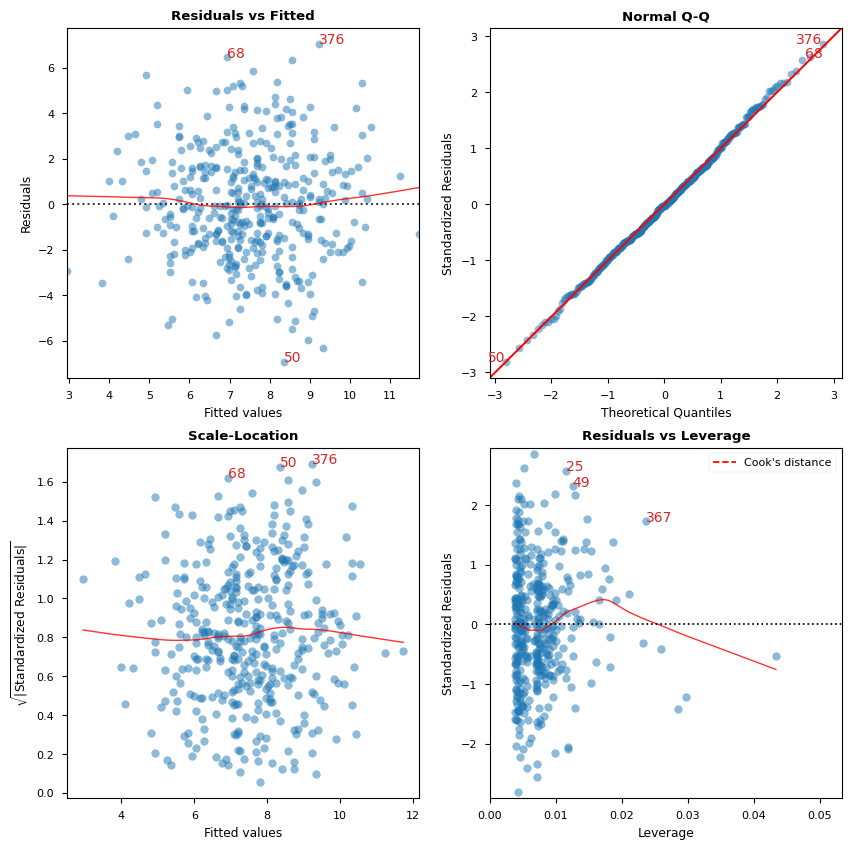

    Features  VIF Factor
1  US[T.Yes]        1.00
2      Price        1.00
0  Intercept       26.12


In [48]:
cls = LinearRegDiagnostic(results)
vif, fig, ax = cls()
print(vif)

In [123]:
cooksD = statsmodels.stats.outliers_influence.OLSInfluence(results).cooks_distance[0]
cooksD_mean = cooksD.mean()
outliers = cooksD[cooksD > 3 * cooksD_mean]
print(f'\n There are {outliers.shape[0]} entries that fall beyond the cooks distance threshold of 3 times the cooks distance mean.')


 There are 33 entries that fall beyond the cooks distance threshold.


Analyzing the graphs also suggest the presence of some high leverage points, while the outlier presence is not as conclusive.

# Ex. 11

In this problem we will investigate the t-statistic for the null hypothesis H0 : β = 0 in simple linear regression without an intercept. To begin, we generate a predictor x and a response y as follows.

In [173]:
rng = np.random.default_rng(1)
x = rng.normal(size=100)
y = 2 * x + rng.normal(size=100)

(a) Perform a simple linear regression of y onto x, without an intercept. Report the coefficient estimate β̂ , the standard error of this coefficient estimate, and the t-statistic and p-value associated with the null hypothesis H0 : β = 0. Comment on these results.

In [175]:
model = sm.OLS(y, x, hasconst=False)
results1 = model.fit()
results1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:                      y   R-squared (uncentered):                   0.743
Model:                            OLS   Adj. R-squared (uncentered):              0.740
Method:                 Least Squares   F-statistic:                              285.6
Date:                Tue, 22 Aug 2023   Prob (F-statistic):                    6.23e-31
Time:                        14:40:37   Log-Likelihood:                         -141.35
No. Observations:                 100   AIC:                                      284.7
Df Residuals:                      99   BIC:                                      287.3
Df Model:                           1                                                  
Covariance Type:            nonrobust                                                  
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
x1             1.9762      0.117     16.898      0.000       1.744       2.208
==============================================================================
Omnibus:                        1.376   Durbin-Watson:                   2.184
Prob(Omnibus):                  0.503   Jarque-Bera (JB):                0.847
Skew:                           0.121   Prob(JB):                        0.655
Kurtosis:                       3.381   Cond. No.                         1.00
==============================================================================

Notes:
[1] R² is computed without centering (uncentered) since the model does not contain a constant.
[2] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

The model without an intercept displays a coefficient estimate of 1.9762, with a standard error of 0.117, a t-statistic of 16.898 and a statistically significant p-value. For every 1 increase in the x value, there is a 1.9762 increase in the y value. The R squared is equal to 0.743.

(b) Now perform a simple linear regression of x onto y without an intercept, and report the coefficient estimate, its standard error, and the corresponding t-statistic and p-values associated with the null hypothesis H0 : β = 0. Comment on these results

In [176]:
model = sm.OLS(x, y, hasconst=False)
results2 = model.fit()
results2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:                      y   R-squared (uncentered):                   0.743
Model:                            OLS   Adj. R-squared (uncentered):              0.740
Method:                 Least Squares   F-statistic:                              285.6
Date:                Tue, 22 Aug 2023   Prob (F-statistic):                    6.23e-31
Time:                        14:40:40   Log-Likelihood:                         -58.349
No. Observations:                 100   AIC:                                      118.7
Df Residuals:                      99   BIC:                                      121.3
Df Model:                           1                                                  
Covariance Type:            nonrobust                                                  
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
x1             0.3757      0.022     16.898      0.000       0.332       0.420
==============================================================================
Omnibus:                       13.156   Durbin-Watson:                   2.034
Prob(Omnibus):                  0.001   Jarque-Bera (JB):               22.596
Skew:                          -0.528   Prob(JB):                     1.24e-05
Kurtosis:                       5.075   Cond. No.                         1.00
==============================================================================

Notes:
[1] R² is computed without centering (uncentered) since the model does not contain a constant.
[2] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

The model without an intercept displays a coefficient estimate of 0.3757, with a standard error of 0.022, a t-statistic of 16.898 and a statistically significant p-value. For every 1 increase in the x value, there is a 0.3757 increase in the y value. The R squared is equal to 0.743.

(c) What is the relationship between the results obtained in (a) and (b)?

We can see that they have the same R squared and t-statistic values. Lets perform a anova_lm analysis.

In [177]:
anova_lm(results1, results2)

,df_resid,ssr,df_diff,ss_diff,F,Pr(>F)
0,99.0,98.91997,0.0,NaN,NaN,NaN
1,99.0,18.80769,-0.0,80.11228,-inf,NaN


Interesting to note that we get an infinite F-statistic, probably indicating the same variability between the groups.

# Ex. 12

(a) Recall the coefficient estimate B^ for the linear regression of Y onto X without an intercept. Under what circumstance is the coefficient estimate for the regression of X onto Y the same as the coefficient estimate for the regression of Y onto X?

If x is identical to y.

(b) Generate an example in Python with n = 100 observations in which the coefficient estimate for the regression of X onto Y is different from the coefficient estimate for the regression of Y onto X.

x = np.linspace(1, 100, 100)
y = x + 1

model = sm.OLS(y, x, hasconst=False)
results1 = model.fit()
coef1 = results1.params[0]

model = sm.OLS(x, y, hasconst=False)
results2 = model.fit()
coef2 = results2.params[0]

print(f'Y onto X coefficient = {coef1}')
print(f'X onto Y coefficient = {coef2}')

(c) Generate an example in Python with n = 100 observations in which the coefficient estimate for the regression of X onto Y is the same as the coefficient from the estimate for the regression of Y onto X.

In [41]:
x = np.linspace(1, 100, 100)
y = x

In [42]:
model = sm.OLS(y, x, hasconst=False)
results1 = model.fit()
coef1 = results1.params[0]

model = sm.OLS(x, y, hasconst=False)
results2 = model.fit()
coef2 = results2.params[0]

print(f'Y onto X coefficient = {coef1}')
print(f'X onto Y coefficient = {coef2}')

Y onto X coefficient = 0.9999999999999998
X onto Y coefficient = 0.9999999999999998


# Ex.13

In this exercise you will create some simulated data and will fit simple linear regression models to it. Make sure to use the default random number generator with seed set to 1 prior to starting part (a) to ensure consistent results.

In [144]:
rng = np.random.default_rng(1)

(a) Using the normal() method of your random number generator, create a vector, x, containing 100 observations drawn from a N(0,1) distribution. This represents a feature, X.

In [145]:
x = rng.normal(size=100)

(b) Using the normal() method, create a vector, eps, containing 100 observations drawn from a N(0,0.25) distribution - a normal distribution with mean zero and variance 0.25.

In [146]:
eps = rng.normal(loc=0.0, scale=np.sqrt(0.25), size=100)

(c) Using x and eps, generate a vector y according to the model

Y = -1 + 0.5X + e

What is the length of the vector y? What are the values of B0 and B1 in this linear model?

In [147]:
y = -1 + 0.5*x + eps
len(y)

100

B0 = -1 and B1 = 0.5

(d) Create a scatterplot displaying the relationship between x and y. Comment on what you observe.

<Axes: >

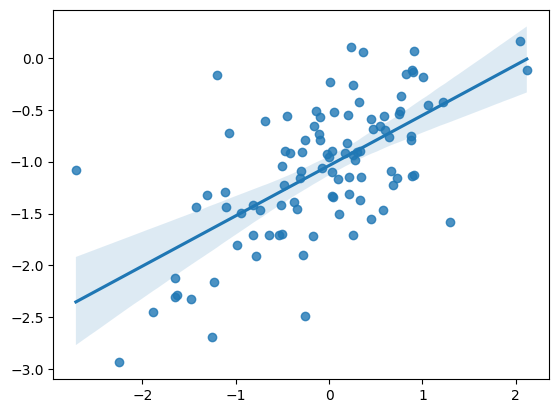

In [148]:
sns.regplot(x=x, y=y)

x and y appear to be in a relatively linear relationship. There are some outliers and high leverage observations. The relationship is direct, an increase in x will determine an increase in y.

(e) Fit a least squares linear model to predict y using x. Comment on the model obtained. How do B0^ and B1^ compare to B0 and B1?

In [149]:
x = sm.add_constant(x)
model = sm.OLS(y, x)
results = model.fit()
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.409
Model:                            OLS   Adj. R-squared:                  0.403
Method:                 Least Squares   F-statistic:                     67.79
Date:                Wed, 23 Aug 2023   Prob (F-statistic):           8.04e-13
Time:                        14:12:52   Log-Likelihood:                -71.745
No. Observations:                 100   AIC:                             147.5
Df Residuals:                      98   BIC:                             152.7
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         -1.0380      0.050    -20.647      0.000      -1.138      -0.938
x1             0.4843      0.059      8.233      0.000       0.368       0.601
==============================================================================
Omnibus:                        1.277   Durbin-Watson:                   2.198
Prob(Omnibus):                  0.528   Jarque-Bera (JB):                0.759
Skew:                           0.114   Prob(JB):                        0.684
Kurtosis:                       3.361   Cond. No.                         1.20
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [150]:
true_b0 = -1
true_b1 = 0.5
pred_b0 = results.params[0]
pred_b1 = results.params[1]

print(
f'True intercept: {true_b0}\nTrue coefficient: {true_b1}\n\n\
Predicted intercept: {pred_b0}\nPredicted coefficient: {pred_b1}'
)

x = x[:,1]

True intercept: -1
True coefficient: 0.5

Predicted intercept: -1.0380127774981607
Predicted coefficient: 0.48429101457751783


(f) Display the least squares line on the scatterplot obtained in (d). Draw the population regression line on the plot, in a different color. Use the legend() method of the axes to create an appropiate legend.

Already plotted the least squared line with the regplot method from seaborn... but lets do it in another way!

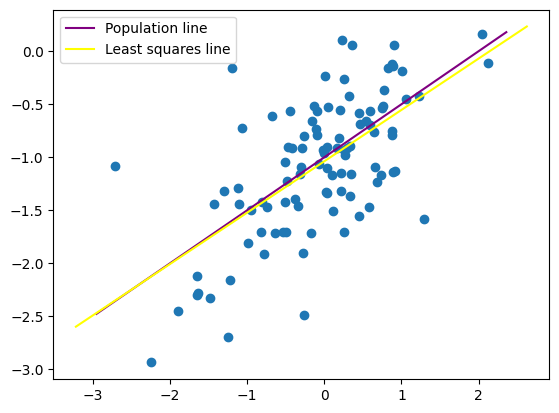

In [151]:
def abline(ax, b, m, *args, **kwargs):
    'Add a line with slope m and intercept b to ax'
    xlim = ax.get_xlim()
    ylim = [m * xlim[0] + b, m * xlim[1] + b]
    ax.plot(xlim, ylim, *args, **kwargs)

y_true = y
y_pred = pred_b0 + pred_b1 * x

fig = plt.figure()
ax = fig.add_subplot()
ax.scatter(x, y)

abline(ax=ax, b=true_b0, m=true_b1, label='Population line', color='purple')
abline(ax=ax, b=pred_b0, m=pred_b1, label='Least squares line', color='yellow')

plt.legend()

plt.show()

(g) Now fit a polynomial regression model that predicts y using x and x^2. Is there evidence that the quadratic term improves the model fit? Explain your answer.

In [152]:
model = smf.ols('y ~ x + np.square(x)',
                data={'y':y,
                      'x':x})
results_poly = model.fit()
results_poly.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.409
Model:                            OLS   Adj. R-squared:                  0.397
Method:                 Least Squares   F-statistic:                     33.55
Date:                Wed, 23 Aug 2023   Prob (F-statistic):           8.42e-12
Time:                        14:12:53   Log-Likelihood:                -71.744
No. Observations:                 100   AIC:                             149.5
Df Residuals:                      97   BIC:                             157.3
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
================================================================================
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
Intercept       -1.0364      0.060    -17.399      0.000      -1.155      -0.918
x                0.4831      0.063      7.647      0.000       0.358       0.609
np.square(x)    -0.0024      0.045     -0.052      0.959      -0.092       0.088
==============================================================================
Omnibus:                        1.338   Durbin-Watson:                   2.197
Prob(Omnibus):                  0.512   Jarque-Bera (JB):                0.814
Skew:                           0.119   Prob(JB):                        0.666
Kurtosis:                       3.372   Cond. No.                         2.23
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

The quadratic term does not improve the overall fit since x^2 is not statistically relevant.

(h) Repeat (a)-(f) after modifying the data generation process in such a way that there is less noise in the data. The model (3.39) should remain the same. You can do this by decreasing the variance of the normal distribution used to generate the error term e in (b). Describe your results.

    True intercept: -1
    True coefficient: 0.5

    Predicted intercept: -1.0024041391416678
    Predicted coefficient: 0.4990064765266912


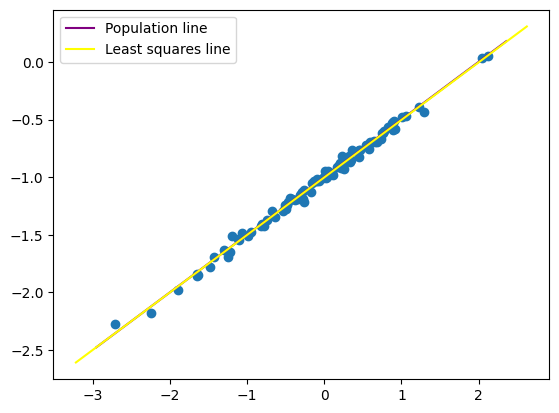

In [163]:
def linear_model_generator(eps_var):
    rng = np.random.default_rng(1)
    x = rng.normal(size=100)
    eps = rng.normal(loc=0.0, scale=np.sqrt(eps_var), size=100)
    y = -1 + 0.5*x + eps
    
    x = sm.add_constant(x)
    model = sm.OLS(y, x)
    results = model.fit()
    results.summary()
    pred_b0 = results.params[0]
    pred_b1 = results.params[1]
    
    print(
    f'    True intercept: {true_b0}\n    True coefficient: {true_b1}\n\n\
    Predicted intercept: {pred_b0}\n    Predicted coefficient: {pred_b1}'
    )
    
    x = x[:,1]

    def abline(ax, b, m, *args, **kwargs):
        'Add a line with slope m and intercept b to ax'
        xlim = ax.get_xlim()
        ylim = [m * xlim[0] + b, m * xlim[1] + b]
        ax.plot(xlim, ylim, *args, **kwargs)
    
    y_true = y
    y_pred = pred_b0 + pred_b1 * x
    
    fig = plt.figure()
    ax = fig.add_subplot()
    ax.scatter(x, y)
    
    abline(ax=ax, b=true_b0, m=true_b1, label='Population line', color='purple')
    abline(ax=ax, b=pred_b0, m=pred_b1, label='Least squares line', color='yellow')
    
    plt.legend()
    
    plt.show()

    return results

less_noisy = linear_model_generator(0.001)

By decreasing the variance of the irreducible error, we are increasing the model accuracy. The relationship between X and Y is much more linear now.

(i) Repeat (a)-(f) after modifying the data generation process in such a way that there is more noise in the data. The model should remain the same. You can do this by increasing the variance of the normal distribution used to generate the error term e in (b). Describe your results.

    True intercept: -1
    True coefficient: 0.5

    Predicted intercept: -1.2404139141667716
    Predicted coefficient: 0.4006476526691495


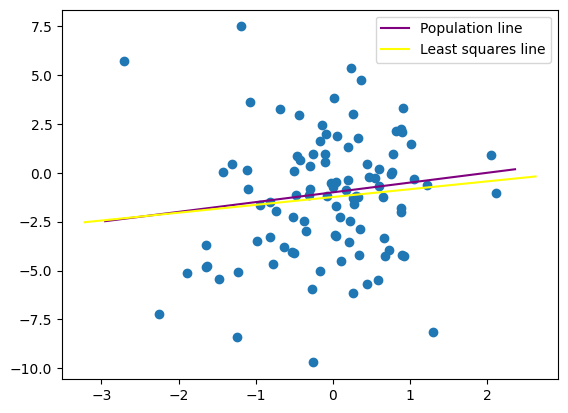

In [154]:
more_noisy = linear_model_generator(10)

By increasing the variance of the irreducible error, we are decreasing the model accuracy. The model fits the data much worse now.

(j) What are the confidence intervals for B0 and B1 based on the original data set, the noisier data set, and the less noisy data set?

In [161]:
results.conf_int()

array([[-1.13778198, -0.93824357],
       [ 0.36756536,  0.60101667]])

In [164]:
less_noisy.conf_int()

array([[-1.0087141 , -0.99609418],
       [ 0.4916241 ,  0.50638885]])

In [165]:
more_noisy.conf_int()

array([[-1.87140977, -0.60941806],
       [-0.33759018,  1.13888549]])

The confidence intervals of the less noisy dataset is less wider than the confidence intervals of the original and the more noisy dataset. This is because of the much less variable error term.

# Ex. 14

This problem focuses on the collinearity problem.

(a) Perform the following commands in Python:

In [216]:
rng = np.random.default_rng(10)
x1 = rng.uniform(0, 1, size=100)
x2 = 0.5 * x1 + rng.normal(size=100) / 10
y = 2 + 2 * x1 + 0.3 * x2 + rng.normal(size=100)

The last line corresponds to creating a linear model in which y is a function of x1 and x2. Write out the form of the linear model. What are the regression coefficients?

The intercept is 2, the x1 coefficient is 2, the x2 coefficient is 0.3, the error term is rng.normal(size=100)

(b) What is the correlation between x1 and x2? Create a scatterplot displaying the relationship between the variables.

In [217]:
x1_with_constant = sm.add_constant(x1)
model = sm.OLS(x1, x2)
results = model.fit()
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:                      y   R-squared (uncentered):                   0.846
Model:                            OLS   Adj. R-squared (uncentered):              0.844
Method:                 Least Squares   F-statistic:                              543.4
Date:                Wed, 23 Aug 2023   Prob (F-statistic):                    5.46e-42
Time:                        16:05:45   Log-Likelihood:                          8.8519
No. Observations:                 100   AIC:                                     -15.70
Df Residuals:                      99   BIC:                                     -13.10
Df Model:                           1                                                  
Covariance Type:            nonrobust                                                  
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
x1             1.8575      0.080     23.310      0.000       1.699       2.016
==============================================================================
Omnibus:                        0.008   Durbin-Watson:                   1.607
Prob(Omnibus):                  0.996   Jarque-Bera (JB):                0.042
Skew:                          -0.000   Prob(JB):                        0.979
Kurtosis:                       2.899   Cond. No.                         1.00
==============================================================================

Notes:
[1] R² is computed without centering (uncentered) since the model does not contain a constant.
[2] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

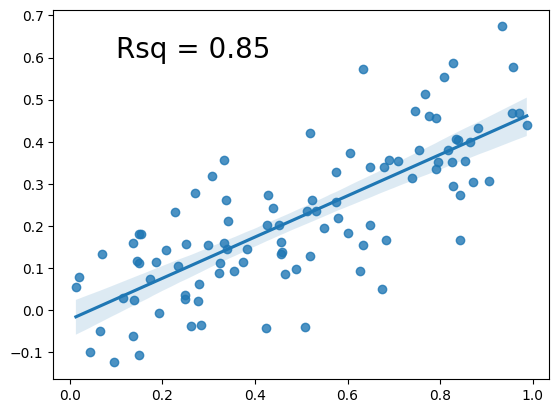

In [218]:
fig, ax = plt.subplots()
sns.regplot(x=x1, y=x2, ax=ax)
text = ax.annotate(xy=[0.1,0.6], xytext=[0.1, 0.6], text=f'Rsq = {results.rsquared.round(2)}', size=20)

(c) Using this data, fit a least squares regression to predict y using x1 and x2. Describe the results obtained. What are B0^, B1^ and B2^? How do these relate to the true B0, B1 and B2? Can you reject the null hypothesis H0 : B1 = 0? How about the null hypothesis H0 : B2 = 0?

In [219]:
model = smf.ols('y ~ 1 + x1 + x2', data={'y':y,
                                         'x1':x1,
                                         'x2':x2})
results = model.fit()
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.291
Model:                            OLS   Adj. R-squared:                  0.276
Method:                 Least Squares   F-statistic:                     19.89
Date:                Wed, 23 Aug 2023   Prob (F-statistic):           5.76e-08
Time:                        16:05:50   Log-Likelihood:                -130.62
No. Observations:                 100   AIC:                             267.2
Df Residuals:                      97   BIC:                             275.1
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      1.9579      0.190     10.319      0.000       1.581       2.334
x1             1.6154      0.527      3.065      0.003       0.569       2.661
x2             0.9428      0.831      1.134      0.259      -0.707       2.592
==============================================================================
Omnibus:                        0.051   Durbin-Watson:                   1.964
Prob(Omnibus):                  0.975   Jarque-Bera (JB):                0.041
Skew:                          -0.036   Prob(JB):                        0.979
Kurtosis:                       2.931   Cond. No.                         11.9
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

Y can somewhat be predicted by a multiple linear regression using x1 and x2 since the Rsq is around 0.291. The F statistic is quite high and it is statistically significant because of the low P value.

B0^ = 1.9579
B1^ = 1.6154
B2^ = 0.9428

B0 = 2
B1 = 2
B2 = 0.3

H0 : β1 = 0 can be rejected because the p value for the x1 coefficient is sufficiently low.
H0 : β2 = 0 can not be rejected because the p value for the x2 coefficient is not sufficiently low.

(d) Now fit a least squares regression to predict y using only x1. Comment on your results. Can you reject the null hypothesis H0 : β1 = 0?

In [220]:
model = smf.ols('y ~ 1 + x1', data={'y':y,
                                    'x1':x1})
results = model.fit()
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.281
Model:                            OLS   Adj. R-squared:                  0.274
Method:                 Least Squares   F-statistic:                     38.39
Date:                Wed, 23 Aug 2023   Prob (F-statistic):           1.37e-08
Time:                        16:05:52   Log-Likelihood:                -131.28
No. Observations:                 100   AIC:                             266.6
Df Residuals:                      98   BIC:                             271.8
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      1.9371      0.189     10.242      0.000       1.562       2.312
x1             2.0771      0.335      6.196      0.000       1.412       2.742
==============================================================================
Omnibus:                        0.204   Durbin-Watson:                   1.931
Prob(Omnibus):                  0.903   Jarque-Bera (JB):                0.042
Skew:                          -0.046   Prob(JB):                        0.979
Kurtosis:                       3.038   Cond. No.                         4.65
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

Yes, we can reject the null hypothesis.

(e) Now fit a least squares regression to predict y using only x2. Comment on your results. Can you reject the null hypothesis H0 : β1 = 0?

In [221]:
model = smf.ols('y ~ 1 + x2', data={'y':y,
                                    'x2':x2})
results = model.fit()
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.222
Model:                            OLS   Adj. R-squared:                  0.214
Method:                 Least Squares   F-statistic:                     27.99
Date:                Wed, 23 Aug 2023   Prob (F-statistic):           7.43e-07
Time:                        16:05:53   Log-Likelihood:                -135.24
No. Observations:                 100   AIC:                             274.5
Df Residuals:                      98   BIC:                             279.7
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      2.3239      0.154     15.124      0.000       2.019       2.629
x2             2.9103      0.550      5.291      0.000       1.819       4.002
==============================================================================
Omnibus:                        0.191   Durbin-Watson:                   1.943
Prob(Omnibus):                  0.909   Jarque-Bera (JB):                0.373
Skew:                          -0.034   Prob(JB):                        0.830
Kurtosis:                       2.709   Cond. No.                         6.11
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

Yes, we can reject the null hypothesis.

(f) Do the results obtained in (c)-(e) contradict each other? Explain your answer.

No, the results do not contradict each other. As the predictors “x1” and “x2” are highly correlated we are in the presence of collinearity, in this case it can be difficult to determine how each predictor separately is associated with the response. Since collinearity reduces the accuracy of the estimates of the regression coefficients, it causes the standard error for β^1
 to grow (we have a standard error of 0.7211795 and 1.1337225 for “x1” and “x2” respectively in the model with two predictors and only of 0.3962774 and 0.6330467 for “x1” and “x2” respectively in the models with only one predictor). Consequently, we may fail to reject H0
 in the presence of collinearity. The importance of the “x2” variable has been masked due to the presence of collinearity.

 answer source: https://rpubs.com/ppaquay/65559

(g) Suppose we obtain one additional observation, which was unfortunately mismeasured. We use the function np.concatenate() to add this additional observation to each of x1, x2 and y.

In [222]:
x1 = np.concatenate([x1, [0.1]])
x2 = np.concatenate([x2, [0.8]])
y = np.concatenate([y, [6]])

In [223]:
model = smf.ols('y ~ 1 + x1 + x2', data={'y':y,
                                         'x1':x1,
                                         'x2':x2})
results = model.fit()
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.292
Model:                            OLS   Adj. R-squared:                  0.277
Method:                 Least Squares   F-statistic:                     20.17
Date:                Wed, 23 Aug 2023   Prob (F-statistic):           4.60e-08
Time:                        16:06:00   Log-Likelihood:                -135.30
No. Observations:                 101   AIC:                             276.6
Df Residuals:                      98   BIC:                             284.5
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      2.0618      0.192     10.720      0.000       1.680       2.443
x1             0.8575      0.466      1.838      0.069      -0.068       1.783
x2             2.2663      0.705      3.216      0.002       0.868       3.665
==============================================================================
Omnibus:                        0.139   Durbin-Watson:                   1.894
Prob(Omnibus):                  0.933   Jarque-Bera (JB):                0.320
Skew:                           0.013   Prob(JB):                        0.852
Kurtosis:                       2.725   Cond. No.                         9.68
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

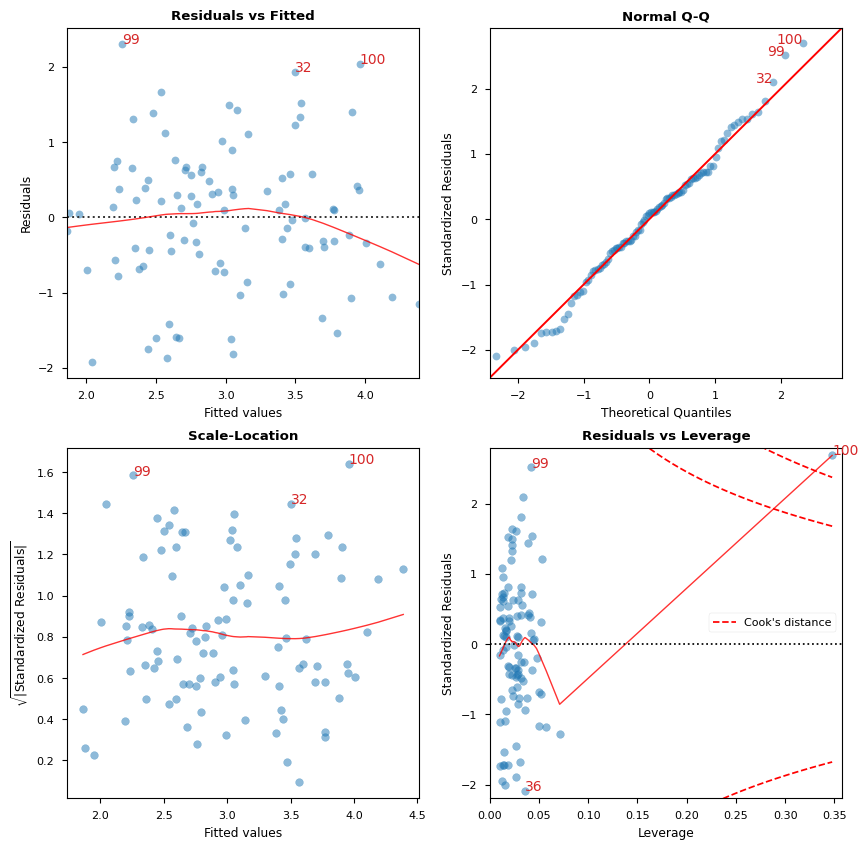

    Features  VIF Factor
1         x1        1.86
2         x2        1.86
0  Intercept        4.25


In [213]:
cls = LinearRegDiagnostic(results)
vif, fig, ax = cls()
print(vif)

It seems like the collinearity is now a little bit masked since the p value is a lot lower for the x2 coefficient, even though the p-value for the x1 coefficient is just above 0.05.

For this model, the value is not only an outlier but a leverage point too, explained by the residuals vs leverage plot.

In [211]:
model = smf.ols('y ~ 1 + x1', data={'y':y,
                                    'x1':x1})
results_x1 = model.fit()
results_x1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.217
Model:                            OLS   Adj. R-squared:                  0.209
Method:                 Least Squares   F-statistic:                     27.42
Date:                Wed, 23 Aug 2023   Prob (F-statistic):           9.23e-07
Time:                        15:57:36   Log-Likelihood:                -140.37
No. Observations:                 101   AIC:                             284.7
Df Residuals:                      99   BIC:                             290.0
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      2.0739      0.201     10.310      0.000       1.675       2.473
x1             1.8760      0.358      5.236      0.000       1.165       2.587
==============================================================================
Omnibus:                        8.232   Durbin-Watson:                   1.636
Prob(Omnibus):                  0.016   Jarque-Bera (JB):               10.781
Skew:                           0.396   Prob(JB):                      0.00456
Kurtosis:                       4.391   Cond. No.                         4.61
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

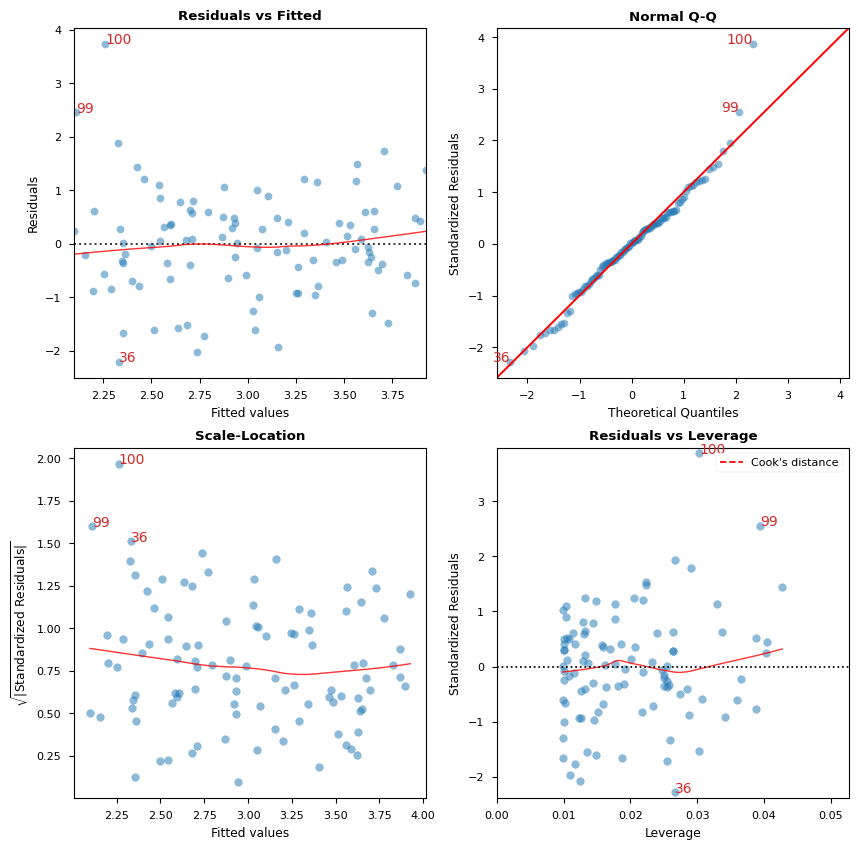

    Features  VIF Factor
1         x1        1.00
0  Intercept        4.25


In [214]:
cls = LinearRegDiagnostic(results_x1)
vif, fig, ax = cls()
print(vif)

In this model the last observation is not a leverage point but an outlier.

In [212]:
model = smf.ols('y ~ 1 + x2', data={'y':y,
                                    'x2':x2})
results_x2 = model.fit()
results_x2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.267
Model:                            OLS   Adj. R-squared:                  0.260
Method:                 Least Squares   F-statistic:                     36.10
Date:                Wed, 23 Aug 2023   Prob (F-statistic):           3.13e-08
Time:                        15:57:36   Log-Likelihood:                -137.01
No. Observations:                 101   AIC:                             278.0
Df Residuals:                      99   BIC:                             283.3
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      2.2840      0.151     15.088      0.000       1.984       2.584
x2             3.1458      0.524      6.008      0.000       2.107       4.185
==============================================================================
Omnibus:                        0.495   Durbin-Watson:                   1.939
Prob(Omnibus):                  0.781   Jarque-Bera (JB):                0.631
Skew:                          -0.041   Prob(JB):                        0.729
Kurtosis:                       2.621   Cond. No.                         5.84
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

The main noticeble thing is that in the multiple linear model the b1^ is not statistically significant while b2^ is statistically significant.

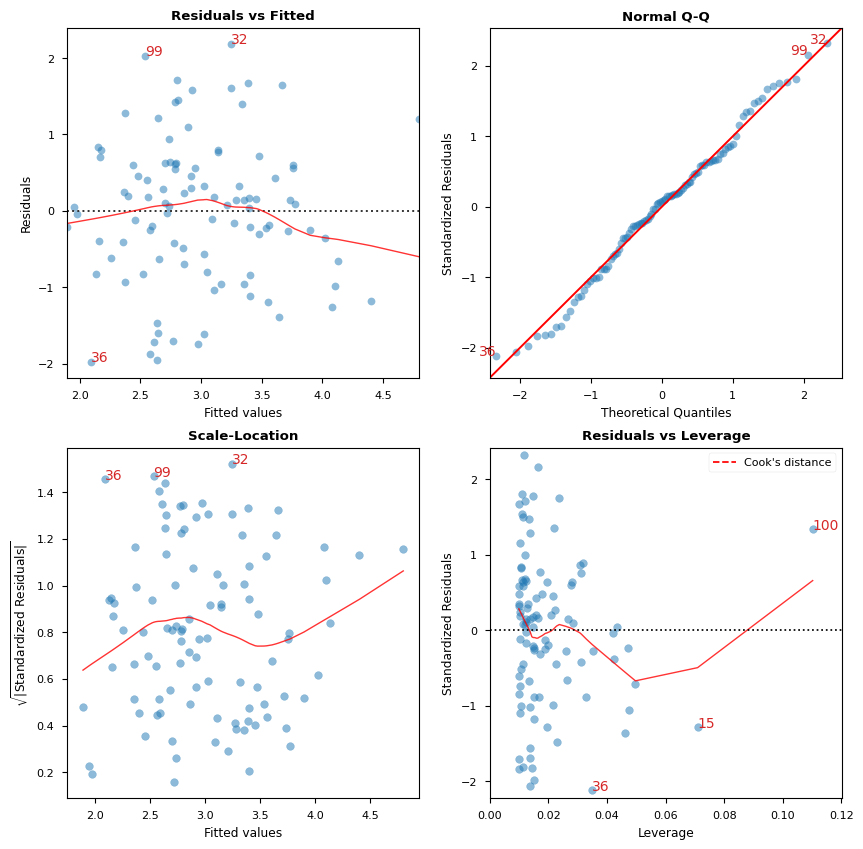

    Features  VIF Factor
1         x2        1.00
0  Intercept        2.57


In [215]:
cls = LinearRegDiagnostic(results_x2)
vif, fig, ax = cls()
print(vif)

In this model the last observation is a leverage point but not an outlier.

# Ex. 15 

This problem involves the Boston data set, which we saw in the lab for this chapter. We will now try to predict per capita crime rate using the other variables in this data set. In other words, per capita crime rate is the response, and the other variables are the predictors.

(a) For each predictor, fit a simple linear regression model to predict the response. Describe your results. In which of the models is there a statistically significant association between the predictor and the response? Create some plots to back up your assertions.

In [238]:
Boston = load_data('Boston')
y = Boston['crim']
X = Boston.iloc[:, 1:]

def fit_simple_linear_model(x, y):
    model = smf.ols('y ~ 1 + x', data={'x':x,
                                       'y':y})
    results = model.fit()
    return results

results = {}

for predictor in X.columns:
    result = fit_simple_linear_model(X[predictor], y)
    pvalue = result.pvalues.x
    rsq = result.rsquared
    coef = result.params.x
    t_stat = result.tvalues.x
    results[predictor] = {'coefficient': coef,
                          't': t_stat,
                          'pvalue': pvalue,
                          'Rsq': rsq,
                          'model': result}
results = pd.DataFrame(results).T

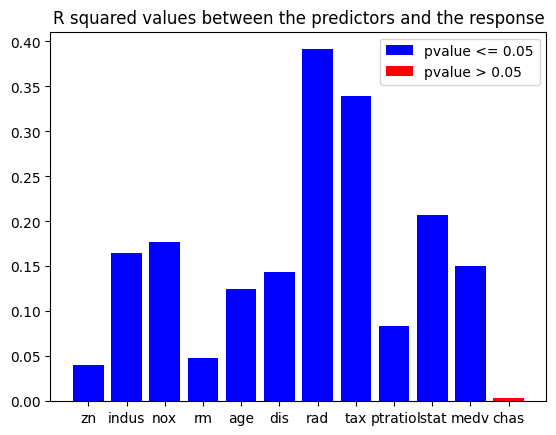

In [239]:
fig = plt.figure()
ax = fig.add_subplot()

significant = results.loc[results['pvalue'] <= 0.05, 'Rsq']
not_significant = results.loc[results['pvalue'] > 0.05, 'Rsq']
ax.bar(x=significant.index,
       height=significant.values,
       color='blue',
       label='pvalue <= 0.05')
ax.bar(x=not_significant.index,
       height=not_significant.values,
       color='red',
       label='pvalue > 0.05')
ax.set_title('R squared values between the predictors and the response')
ax.legend()

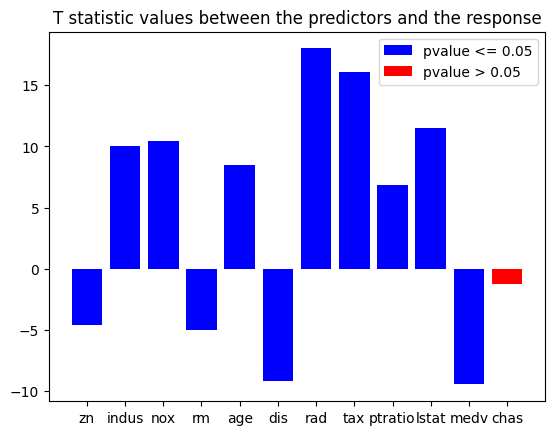

In [240]:
fig = plt.figure()
ax = fig.add_subplot()

significant = results.loc[results['pvalue'] <= 0.05, 't']
not_significant = results.loc[results['pvalue'] > 0.05, 't']
ax.bar(x=significant.index,
       height=significant.values,
       color='blue',
       label='pvalue <= 0.05')
ax.bar(x=not_significant.index,
       height=not_significant.values,
       color='red',
       label='pvalue > 0.05')
ax.set_title('T statistic values between the predictors and the response')
ax.legend()

I would say that there is some statistical significance between every predictor used to train a model that has an R squared of more than 0.10 and that has a low enough pvalue. The plots above speak for themselves.

(b) Fit a multiple regression model to predict the response using all of the pedictors. Describe your results. For which predictors can we reject the null hypothesis H0 : βj = 0?

In [241]:
predictors = ' + '.join(X.columns)
model = smf.ols(f'crim ~ {predictors}', data=Boston)
results2 = model.fit()
results2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                   crim   R-squared:                       0.449
Model:                            OLS   Adj. R-squared:                  0.436
Method:                 Least Squares   F-statistic:                     33.52
Date:                Thu, 24 Aug 2023   Prob (F-statistic):           2.03e-56
Time:                        16:15:55   Log-Likelihood:                -1655.4
No. Observations:                 506   AIC:                             3337.
Df Residuals:                     493   BIC:                             3392.
Df Model:                          12                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     13.7784      7.082      1.946      0.052      -0.136      27.693
zn             0.0457      0.019      2.433      0.015       0.009       0.083
indus         -0.0584      0.084     -0.698      0.486      -0.223       0.106
chas          -0.8254      1.183     -0.697      0.486      -3.150       1.500
nox           -9.9576      5.290     -1.882      0.060     -20.351       0.436
rm             0.6289      0.607      1.036      0.301      -0.564       1.822
age           -0.0008      0.018     -0.047      0.962      -0.036       0.034
dis           -1.0122      0.282     -3.584      0.000      -1.567      -0.457
rad            0.6125      0.088      6.997      0.000       0.440       0.784
tax           -0.0038      0.005     -0.730      0.466      -0.014       0.006
ptratio       -0.3041      0.186     -1.632      0.103      -0.670       0.062
lstat          0.1388      0.076      1.833      0.067      -0.010       0.288
medv          -0.2201      0.060     -3.678      0.000      -0.338      -0.103
==============================================================================
Omnibus:                      663.436   Durbin-Watson:                   1.516
Prob(Omnibus):                  0.000   Jarque-Bera (JB):            80856.852
Skew:                           6.579   Prob(JB):                         0.00
Kurtosis:                      63.514   Cond. No.                     1.24e+04
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.24e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

We can reject the null hypothesis for the zn, dis, rad and medv predictors.

(c) How do your results from (a) compare to your results from (b)? Create a plot displaying the univariate regression coefficients from (a) on the x-axis, and the multiple regression coefficients from (b) on the y-axis. That is, each predictor is displayed as a single point in the plot. Its coefficient in a simple linear regression model is shown on the x-axis, and its coefficient estimate in the multiple linear regression model is shown on the y-axis.

Text(0, 0.5, 'Multivariate fit')

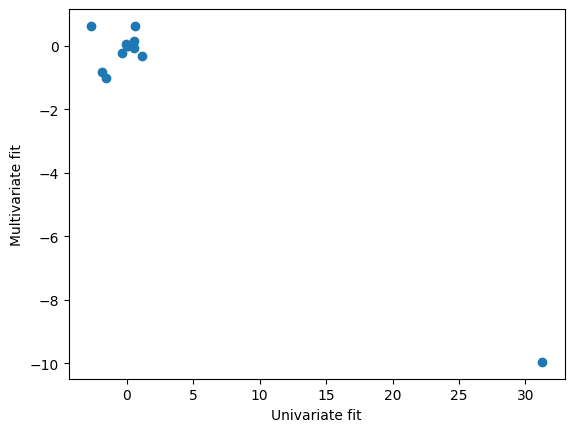

In [242]:
x_axis = results['coefficient']
y_axis = results2.params[1:]

plt.scatter(x_axis,y_axis)
plt.xlabel('Univariate fit')
plt.ylabel('Multivariate fit')

There appears to not be much of a correlation between the coefficients.

(d) Is there evidence of non-linear association between any of the predictors and the response? To answer this question, for each predictor X, fit a model of the form

Y = β0 + β1 X + β2 X 2 + β3 X 3 + e

In [243]:
def custom_simple_linear_regression(x, y):
    model = smf.ols('y ~ 1 + x + np.square(x) + np.power(x, 3)', data={'x': x,
                                                                       'y': y})
    return model.fit()

In [244]:
results_quadratic = {}

for predictor in X.columns:
    result = custom_simple_linear_regression(X[predictor], y)
    pvalue1 = result.pvalues.x
    pvalue2 = result.pvalues['np.square(x)']
    pvalue3 = result.pvalues['np.power(x, 3)']
    rsq = result.rsquared
    coef1 = result.params.x
    coef2 = result.params['np.square(x)']
    coef3 = result.params['np.power(x, 3)']
    t_stat = result.tvalues.x
    results_quadratic[predictor] = {'coefficient(x)': coef1,
                                    'coefficient(x^2)': coef2,
                                    'coefficient(x^3)': coef3,
                                    'pvalue(x)': pvalue1,
                                    'pvalue(x^2)': pvalue2,
                                    'pvalue(x^3)': pvalue3,
                                    'Rsq': rsq,
                                    'model': result}
results_quadratic = pd.DataFrame(results_quadratic)

Lets visualize the residuals vs fitted for both the linear and the quadratic models.

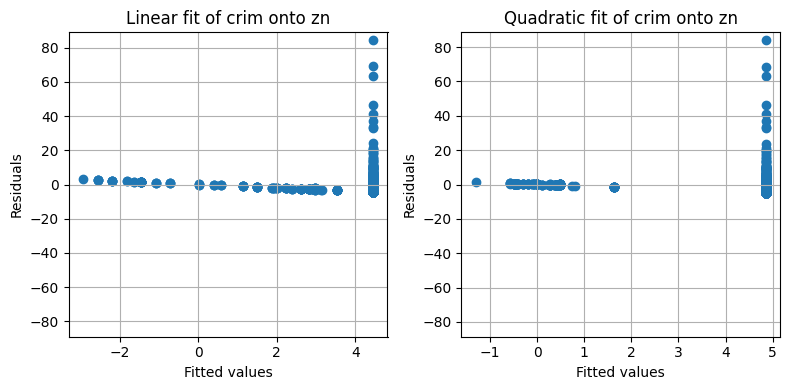

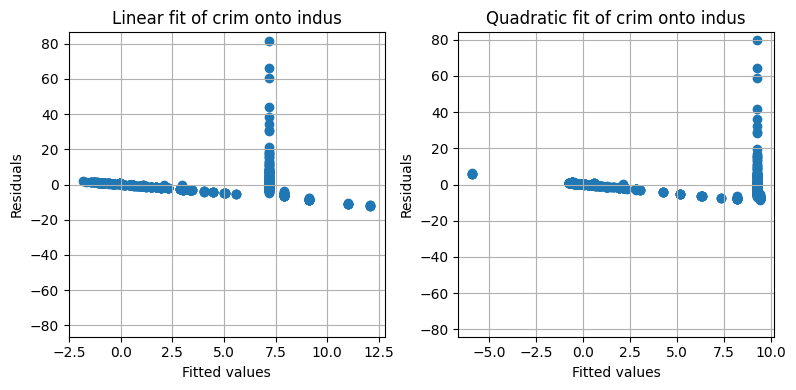

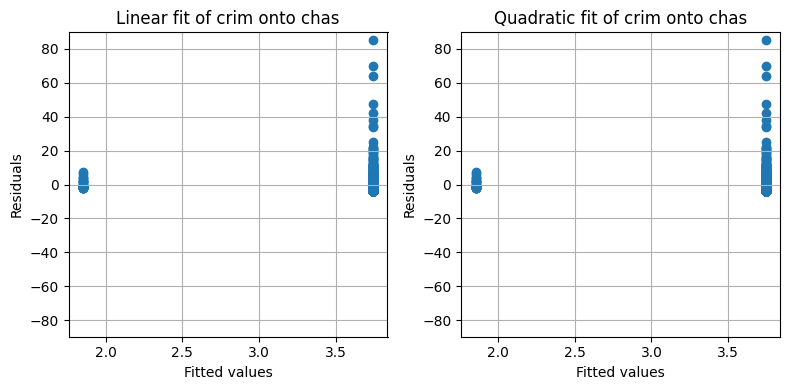

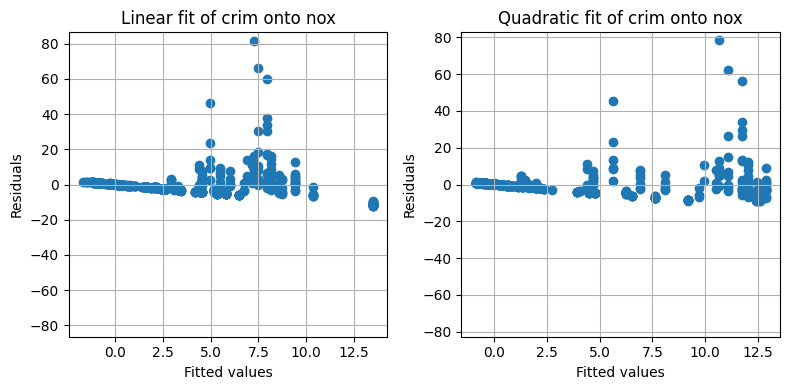

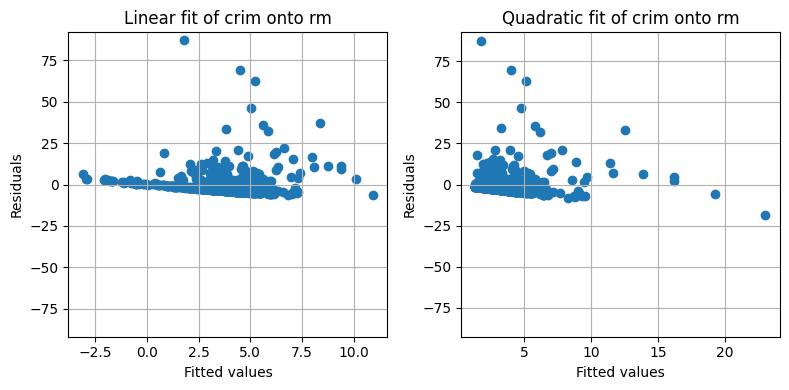

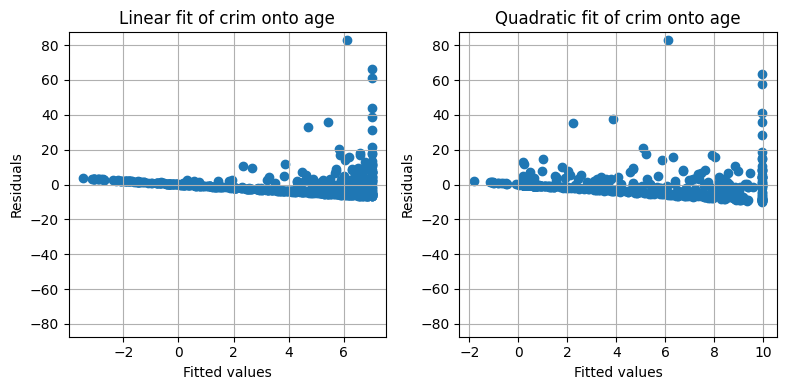

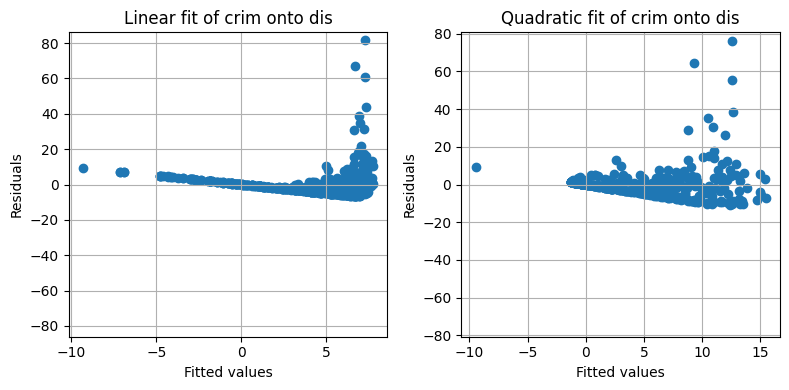

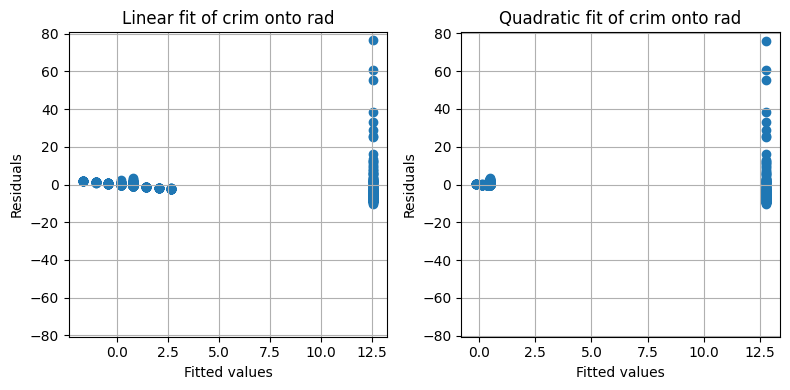

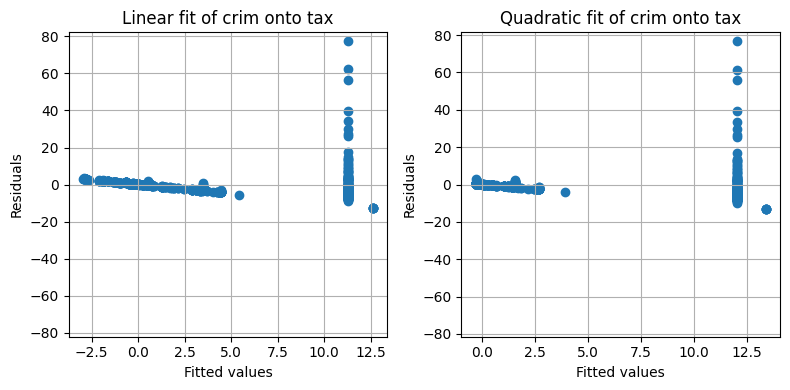

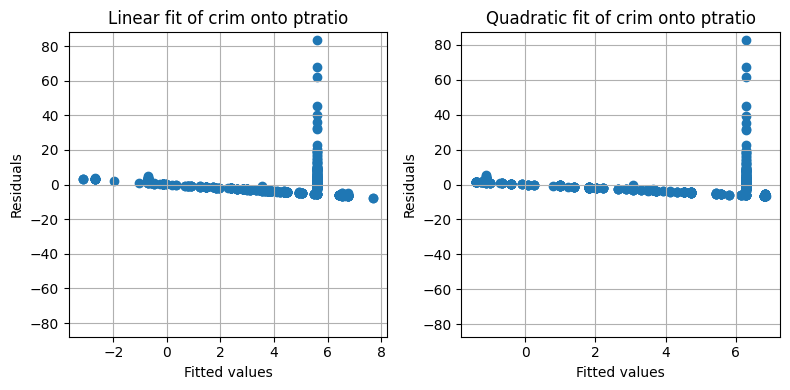

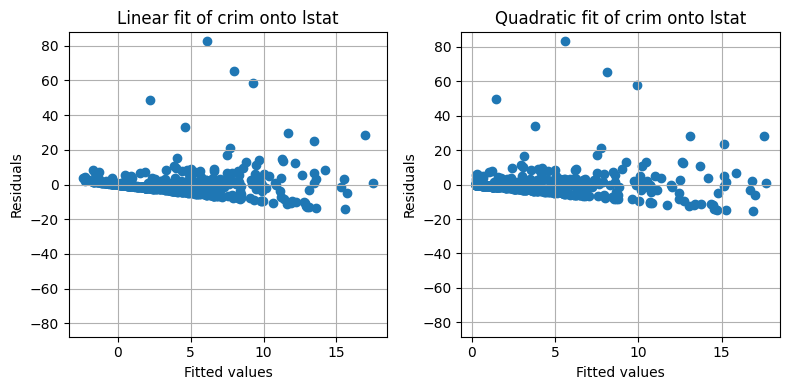

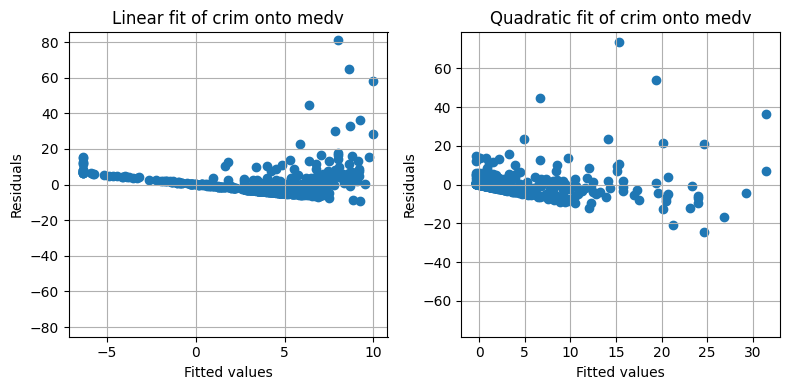

In [245]:
for predictor in X.columns:
    x_linear = results.T[predictor].model.fittedvalues
    y_linear = results.T[predictor].model.resid

    x_quadratic = results_quadratic[predictor].model.fittedvalues
    y_quadratic = results_quadratic[predictor].model.resid
    
    fig = plt.figure(figsize=(8,4))
    
    ax1 = fig.add_subplot(121)
    ax1.scatter(x_linear, y_linear)
    ax1.grid()
    ax1.set_title(f'Linear fit of crim onto {predictor}')
    yabs_max = abs(max(ax1.get_ylim(), key=abs))
    ax1.set_ylim(ymin=-yabs_max, ymax=yabs_max)
    ax1.set_xlabel('Fitted values')
    ax1.set_ylabel('Residuals')
    
    ax2 = fig.add_subplot(122)
    ax2.scatter(x_quadratic, y_quadratic)
    ax2.grid()
    ax2.set_title(f'Quadratic fit of crim onto {predictor}')
    yabs_max = abs(max(ax2.get_ylim(), key=abs))
    ax2.set_ylim(ymin=-yabs_max, ymax=yabs_max)
    ax2.set_xlabel('Fitted values')
    ax2.set_ylabel('Residuals')

    plt.tight_layout()
    plt.show()

In [235]:
pvalues_quadratic = results_quadratic.iloc[3:6].T
pvalues_linear = results['pvalue']

pvalues_comparison = pd.concat([pvalues_quadratic, pvalues_linear], axis='columns')
pvalues_comparison = pvalues_comparison[['pvalue', 'pvalue(x)',	'pvalue(x^2)', 'pvalue(x^3)']]
pvalues_comparison = pvalues_comparison.rename(columns={'pvalue':'pvalue_linear_model'})
pvalues_comparison = pvalues_comparison.applymap(lambda x: 1 if x <= 0.05 else 0)

pvalues_comparison = (pvalues_comparison
                      .reset_index()
                      .rename(columns={'index': 'predictor'}))

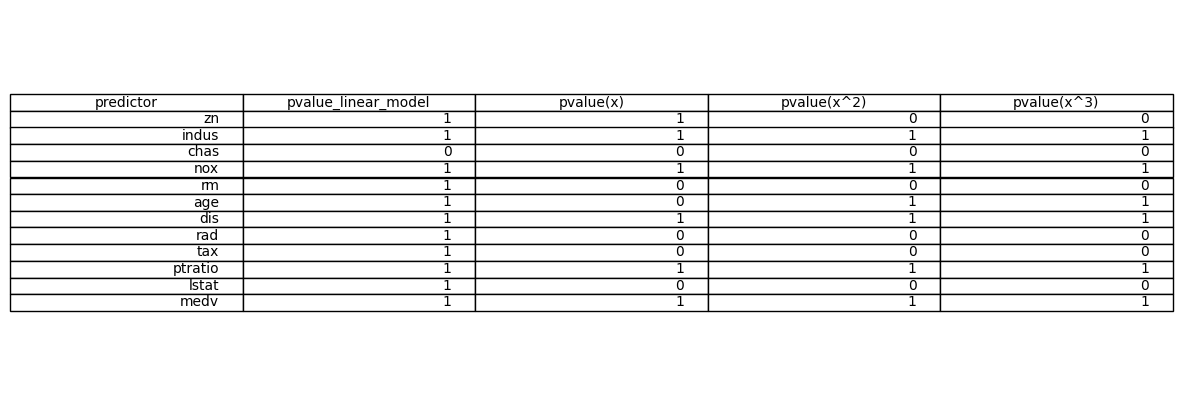

In [246]:
cell_text = []

for row in range(len(pvalues_comparison)):
    cell_text.append(pvalues_comparison.iloc[row])

fig = plt.figure(figsize=(15,5))
ax = fig.add_subplot()

ax.table(cellText=cell_text,
        colLabels=pvalues_comparison.columns,
        loc='center',
        fontsize=150)
ax.axis('off')

plt.show()